# 2. Univariate Data Summary

**metricsAI: An Introduction to Econometrics with Python and AI in the Cloud**

*[Carlos Mendez](https://carlos-mendez.org)*

<img src="https://raw.githubusercontent.com/quarcs-lab/metricsai/main/images/ch02_visual_summary.jpg" alt="Chapter 02 Visual Summary" width="100%">

This notebook provides an interactive introduction to univariate data analysis using Python. You'll learn how to summarize and visualize single-variable datasets using summary statistics and various chart types.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/quarcs-lab/metricsai/blob/main/notebooks_colab/ch02_Univariate_Data_Summary.ipynb)
<div class="chapter-resources">
<a href="https://www.youtube.com/watch?v=qegfQaM9UGE" target="_blank" class="resource-btn">🎬 AI Video</a>
<a href="https://carlos-mendez.my.canva.site/s02-univariate-data-summary-pdf" target="_blank" class="resource-btn">✨ AI Slides</a>
<a href="https://cameron.econ.ucdavis.edu/aed/traedv1_02" target="_blank" class="resource-btn">📊 Cameron Slides</a>
<a href="https://app.edcafe.ai/quizzes/6978644a2f5d08069e046930" target="_blank" class="resource-btn">✏️ Quiz</a>
<a href="https://app.edcafe.ai/chatbots/69789c1e2f5d08069e06f856" target="_blank" class="resource-btn">🤖 AI Tutor</a>
</div>


## Chapter Overview

**Univariate data** consists of observations on a single variable—for example, annual earnings, individual income, or GDP over time. This chapter teaches you how to summarize and visualize such data effectively.

**What you'll learn:**

- Calculate summary statistics (mean, median, standard deviation, quartiles, skewness, kurtosis)
- Create visualizations for numerical data (box plots, histograms, kernel density estimates, line charts)
- Visualize categorical data (bar charts, pie charts)
- Apply data transformations (logarithms, standardization)
- Work with time series transformations (moving averages, seasonal adjustment)

**Datasets used:**

- **AED_EARNINGS.DTA**: Annual earnings for 171 full-time working women aged 30 in 2010
- **AED_REALGDPPC.DTA**: U.S. quarterly real GDP per capita from 1959 to 2020
- **AED_HEALTHCATEGORIES.DTA**: U.S. health expenditures by category in 2018
- **AED_FISHING.DTA**: Fishing site choices for 1,182 fishers
- **AED_MONTHLYHOMESALES.DTA**: Monthly U.S. home sales from 1999 to 2015

**Chapter outline:**

- 2.1 Summary Statistics for Numerical Data
- 2.2 Charts for Numerical Data
- 2.3 Charts for Numerical Data by Category
- 2.4 Charts for Categorical Data
- 2.5 Data Transformation
- 2.6 Data Transformations for Time Series Data
- Practice Exercises
- Case Studies

## Setup

Run this cell first to import all required packages and configure the environment.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import random
import os

# Set random seeds for reproducibility
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)

# GitHub data URL (data streams directly from here)
GITHUB_DATA_URL = "https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/"

# Optional: Create directories for saving outputs locally
IMAGES_DIR = 'images'
TABLES_DIR = 'tables'
os.makedirs(IMAGES_DIR, exist_ok=True)
os.makedirs(TABLES_DIR, exist_ok=True)

# Set plotting style (dark theme matching book design)
plt.style.use('dark_background')
sns.set_style("darkgrid")
plt.rcParams.update({
    'axes.facecolor': '#1a2235',
    'figure.facecolor': '#12162c',
    'grid.color': '#3a4a6b',
    'figure.figsize': (10, 6),
    'text.color': 'white',
    'axes.labelcolor': 'white',
    'xtick.color': 'white',
    'ytick.color': 'white',
    'axes.edgecolor': '#1a2235',
})

print("✓ Setup complete! All packages imported successfully.")
print(f"✓ Random seed set to {RANDOM_SEED} for reproducibility.")
print(f"✓ Data will stream from: {GITHUB_DATA_URL}")

✓ Setup complete! All packages imported successfully.
✓ Random seed set to 42 for reproducibility.
✓ Data will stream from: https://raw.githubusercontent.com/quarcs-lab/data-open/master/AED/


## 2.1 Summary Statistics for Numerical Data

**Summary statistics** provide a concise numerical description of a dataset. For a sample of size $n$, observations are denoted: $$x_1, x_2, \ldots, x_n$$

**Key summary statistics:**

1. **Mean (average)**: $$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

2. **Median**: The middle value when data are ordered

3. **Standard deviation**: Measures the spread of data around the mean
   $$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$

4. **Quartiles**: Values that divide ordered data into fourths (25th, 50th, 75th percentiles)

5. **Skewness**: Measures asymmetry of the distribution (positive = right-skewed)

6. **Kurtosis**: Measures heaviness of distribution tails (higher = fatter tails)

**Economic Example:** We'll examine annual earnings for full-time working women aged 30 in 2010.

### Load Earnings Data

In [2]:
# Load the earnings dataset from GitHub
data_earnings = pd.read_stata(GITHUB_DATA_URL + 'AED_EARNINGS.DTA')

print(f"✓ Data loaded successfully!")
print(f"  Shape: {data_earnings.shape[0]} observations, {data_earnings.shape[1]} variables")
print("\nFirst 5 observations:")
print(data_earnings.head())

✓ Data loaded successfully!
  Shape: 171 observations, 4 variables

First 5 observations:
   earnings  education  age  gender
0     25000         14   30     0.0
1     40000         12   30     0.0
2     25000         13   30     0.0
3     38000         13   30     0.0
4     28800         12   30     0.0


### Summary Statistics

In [3]:
# Basic summary statistics
print("=" * 70)
print("Basic Descriptive Statistics")
print("=" * 70)
print(data_earnings.describe())

# Detailed statistics for earnings
earnings = data_earnings['earnings']

stats_dict = {
    'Count': len(earnings),
    'Mean': earnings.mean(),
    'Std Dev': earnings.std(),
    'Min': earnings.min(),
    '25th percentile': earnings.quantile(0.25),
    'Median': earnings.median(),
    '75th percentile': earnings.quantile(0.75),
    'Max': earnings.max(),
    'Skewness': stats.skew(earnings),
    'Kurtosis': stats.kurtosis(earnings)  # Excess kurtosis (raw kurtosis - 3)
}

print("\n" + "=" * 70)
print("Summary Statistics for Earnings")
print("=" * 70)
for key, value in stats_dict.items():
    if key in ['Count']:
        print(f"{key:20s}: {value:,.0f}")
    elif key in ['Skewness', 'Kurtosis']:
        print(f"{key:20s}: {value:.2f}")
    else:
        print(f"{key:20s}: ${value:,.2f}")

Basic Descriptive Statistics
            earnings   education    age  gender
count     171.000000  171.000000  171.0   171.0
mean    41412.690058   14.432749   30.0     0.0
std     25527.053396    2.735364    0.0     0.0
min      1050.000000    3.000000   30.0     0.0
25%     25000.000000   12.000000   30.0     0.0
50%     36000.000000   14.000000   30.0     0.0
75%     49000.000000   16.000000   30.0     0.0
max    172000.000000   20.000000   30.0     0.0

Summary Statistics for Earnings
Count               : 171
Mean                : $41,412.69
Std Dev             : $25,527.05
Min                 : $1,050.00
25th percentile     : $25,000.00
Median              : $36,000.00
75th percentile     : $49,000.00
Max                 : $172,000.00
Skewness            : 1.71
Kurtosis            : 4.32


**Key findings from the 171 full-time working women aged 30:**

**1. Central Tendency - Mean vs Median:**

- **Mean = \$41,412.69**: The arithmetic average
- **Median = \$36,000**: The middle value
- **Gap = \$5,412** (mean is 15% higher than median)
- **Why?** This signals right skewness—some high earners pull the mean upward

**2. Spread - Standard Deviation:**

- **Std Dev = \$25,527.05**
- This equals 61.6% of the mean (substantial variation)
- **Rule of thumb:** About 68% of women earn within \$41,413 ± \$25,527 = \$15,886 to \$66,940

**3. Range and Quartiles:**

- **Minimum = \$1,050** (possibly part-time misclassified, or very low earner)
- **25th percentile = \$25,000** (bottom quarter earns ≤\$25k)
- **75th percentile = \$49,000** (top quarter earns ≥\$49k)
- **Maximum = \$172,000** (highest earner makes 164× more than lowest!)
- **Interquartile range (IQR) = \$24,000** (middle 50% span \$24k)

**4. Shape Measures:**

- **Skewness = 1.71** (strongly positive)
  - Values > 1 indicate strong right skew
  - **Interpretation guidelines:**
    - |Skewness| < 0.5: approximately symmetric
    - 0.5 < |Skewness| < 1: moderately skewed
    - |Skewness| > 1: highly skewed (like our data)

  - Long right tail with high earners
  - Distribution is NOT symmetric
- **Kurtosis = 4.32** (excess kurtosis, compared to normal = 0)
  - **Note:** Python's `scipy.stats.kurtosis()` reports *excess kurtosis* by default (raw kurtosis - 3)
  - Raw kurtosis = 7.32; Excess kurtosis = 4.32 (what we report here)
  - Normal distribution has raw kurtosis = 3, so excess kurtosis = 0
  - Heavier tails than normal distribution
  - More extreme values than a bell curve would predict
  - **Interpretation guidelines (excess kurtosis):**
    - Excess kurtosis < 0: light tails (platykurtic)
    - Excess kurtosis ≈ 0: normal tails (mesokurtic)
    - Excess kurtosis > 0: heavy tails (leptokurtic - like our data)

  - Greater chance of outliers

**Economic interpretation:**
Earnings distributions are typically right-skewed because:

- **Lower bound exists**: Can't earn less than zero (or minimum wage)
- **No upper bound**: Some professionals earn very high incomes
- **Labor market structure**: Most workers cluster around median, but executives, specialists, and entrepreneurs create a long right tail

**Practical implication:** The median (36,000) is a better measure of "typical" earnings than the mean (41,413) because it's not inflated by high earners.

> **Key Concept 2.1: Summary Statistics**
>
> Summary statistics condense datasets into interpretable measures of central tendency (mean, median) and dispersion (standard deviation, quartiles). The median is more robust to outliers than the mean, making it preferred for skewed distributions common in economic data like earnings and wealth.

### Box Plot

A **box plot** (or box-and-whisker plot) visualizes key summary statistics:

- **Box**: Extends from the 25th to 75th percentile (interquartile range)
- **Red line**: Median (50th percentile)
- **Whiskers**: Extend to minimum and maximum values (or 1.5 × IQR from quartiles)
- **Dots**: Outliers beyond the whiskers

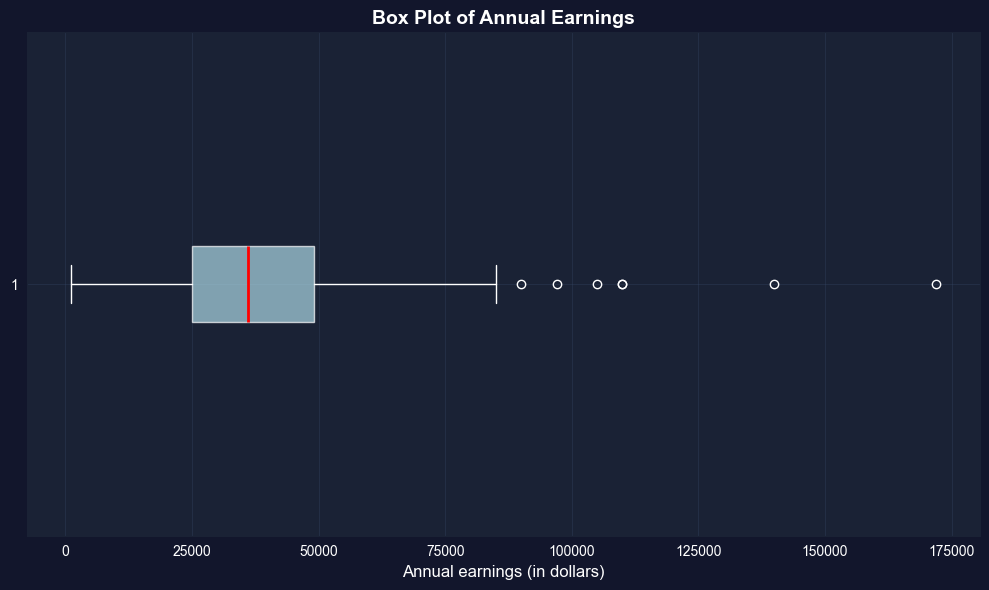


📊 The box plot shows:
   - Most earnings are between $25,000 and $50,000 (the box)
   - The median ($36,000) is closer to the lower quartile
   - Several high-earning outliers on the right


In [4]:
# Create box plot of earnings
fig, ax = plt.subplots(figsize=(10, 6))
bp = ax.boxplot(earnings, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
ax.set_xlabel('Annual earnings (in dollars)', fontsize=12)
ax.set_title('Box Plot of Annual Earnings', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 The box plot shows:")
print("   - Most earnings are between $25,000 and $50,000 (the box)")
print("   - The median ($36,000) is closer to the lower quartile")
print("   - Several high-earning outliers on the right")

**What the box plot reveals:**

**1. The Box (Interquartile Range):**

- Extends from \$25,000 (Q1) to \$49,000 (Q3)
- Contains the middle 50% of earners
- Width of \$24,000 shows moderate spread in the middle

**2. The Red Line (Median):**

- Located at \$36,000
- Positioned closer to the LOWER edge of the box
- This leftward position confirms right skewness

**3. The Whiskers:**

- Lower whisker extends to \$1,050 (minimum)
- Upper whisker extends to outliers
- Right whisker is MUCH longer than left whisker (asymmetry)

**4. The Outliers (dots on right):**

- Several points beyond the upper whisker
- Represent high earners (likely \$100k+)
- Maximum at \$172,000 is an extreme outlier

**Visual insights:**

- **NOT symmetric**: If symmetric, median would be in center of box
- **Right tail dominates**: Upper whisker + outliers extend much farther than lower whisker
- **Concentration**: Most data packed in the 25k-49k range
- **Rare extremes**: A few very high earners create the long right tail

**Comparison to summary statistics:**

- Box plot VISUALLY confirms what skewness (1.71) told us numerically
- Quartiles (25k, 36k, 49k) match the box structure
- Outliers explain why kurtosis (4.32) is high—heavy tails

**Economic story:** The typical woman in this sample earns 25k-49k, but a small group of high earners (doctors, lawyers, executives?) creates substantial inequality within this age-30 cohort.


**Transition:** Now that we've calculated summary statistics for earnings data, let's explore how *visualizations* can reveal patterns that numbers alone might miss. Charts make distributions, outliers, and trends immediately visible.



## 2.2 Charts for Numerical Data

Beyond summary statistics, **visualizations** reveal patterns in data that numbers alone might miss.

**Common charts for numerical data:**

1. **Histogram**: Shows the frequency distribution by grouping data into bins
2. **Kernel density estimate**: A smoothed histogram that estimates the underlying continuous distribution
3. **Line chart**: For ordered data (especially time series)

**Bin width matters:** Wider bins give a coarse overview; narrower bins show more detail but can be noisy.

### Histograms with Different Bin Widths

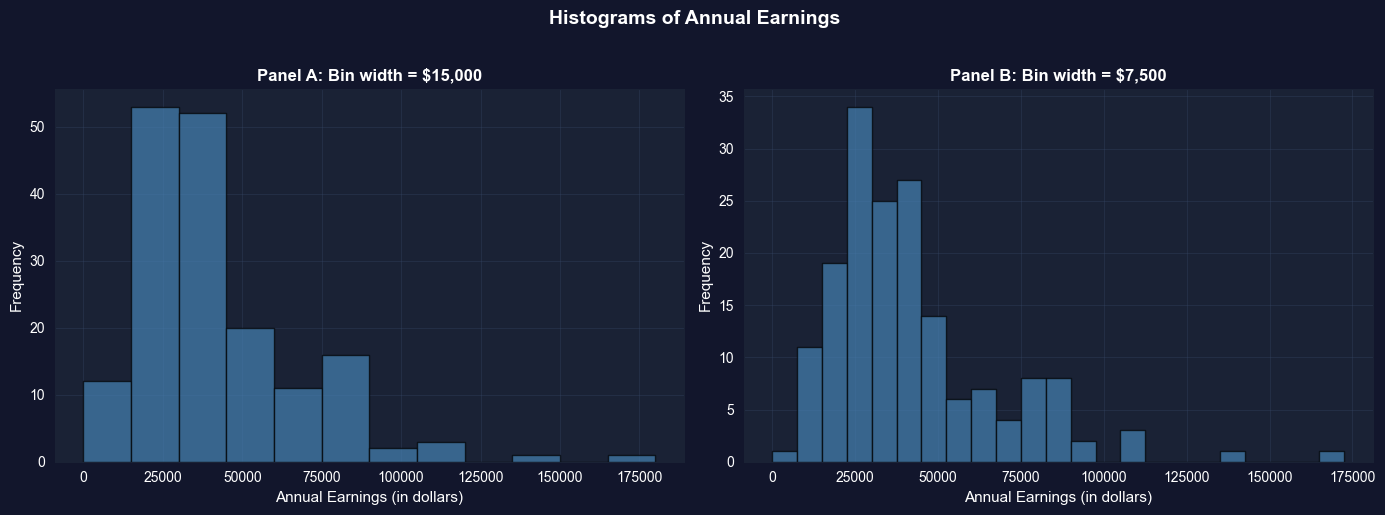


📊 Comparing bin widths:
   - Panel A (wider bins): Shows overall shape—most earnings are $15k-$45k
   - Panel B (narrower bins): Reveals more detail—peaks around $25k-$30k


In [5]:
# Create histograms with different bin widths
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Wider bins ($15,000)
axes[0].hist(earnings, bins=range(0, int(earnings.max()) + 15000, 15000),
             edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Annual Earnings (in dollars)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Panel A: Bin width = $15,000', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Panel B: Narrower bins ($7,500)
axes[1].hist(earnings, bins=range(0, int(earnings.max()) + 7500, 7500),
             edgecolor='black', alpha=0.7, color='steelblue')
axes[1].set_xlabel('Annual Earnings (in dollars)', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Panel B: Bin width = $7,500', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Histograms of Annual Earnings', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Comparing bin widths:")
print("   - Panel A (wider bins): Shows overall shape—most earnings are $15k-$45k")
print("   - Panel B (narrower bins): Reveals more detail—peaks around $25k-$30k")

**Panel A: Wider bins (\$15,000):**

- **Reveals overall shape**: Right-skewed distribution with long right tail
- **Peak location**: Highest bar is in the \$15k-\$30k range
- **Pattern**: Frequencies decline as earnings increase
- **Advantages**: Simple, clear overall pattern, less "noisy"
- **Disadvantages**: Hides fine details, obscures multiple modes

**Panel B: Narrower bins (\$7,500):**

- **Reveals more detail**: Multiple peaks visible within the distribution
- **Peak location**: Clearer concentration around \$22.5k-\$30k
- **Secondary peaks**: Visible around \$37.5k-\$45k (possible clustering at round numbers?)
- **Advantages**: Shows fine structure, reveals potential clustering
- **Disadvantages**: More "jagged," can look noisy

**Key observations across both panels:**

1. **Right skewness confirmed**: Both histograms show long right tail extending to \$172,000

2. **Modal region**: Most common earnings are in the \$15k-\$45k range
   - This contains ~75% of observations
   - Consistent with Q1 (\$25k) and Q3 (\$49k)

3. **Sparse right tail**: Very few observations above \$90k
   - But these high earners substantially influence the mean
   - This is why mean (\$41,413) > median (\$36,000)

4. **Bin width matters**: - **Too wide**: Oversimplifies, may miss important features
   - **Too narrow**: Introduces noise, harder to see overall pattern
   - **Rule of thumb**: Try multiple bin widths to understand your data

**Economic interpretation:**
The clustering in the \$25k-\$45k range likely reflects:

- **Entry-level professional salaries** for college graduates
- **Regional wage variations** within the sample
- **Occupational differences** (teachers vs. nurses vs. business professionals)
- **Experience effects** (all are age 30, but different career progressions)

**Statistical lesson:** Always experiment with bin widths in histograms—different choices reveal different aspects of the data!


> **Key Concept 2.2: Histograms and Density Plots**
>
> Histograms visualize distributions using bins whose width determines the level of detail. Kernel density estimates provide smooth approximations of the underlying distribution, while line charts are ideal for time series data to show trends and patterns over time.



### Kernel Density Estimate

A **kernel density estimate (KDE)** is a smoothed version of a histogram. It estimates the underlying continuous probability density function.

**Advantages:**

- Smooth, continuous curve (no arbitrary bin edges)
- Easier to see the overall shape
- Can compare to theoretical distributions (e.g., normal distribution)

**How it works:** Instead of fixed bins, KDE uses overlapping "windows" that give more weight to nearby observations.

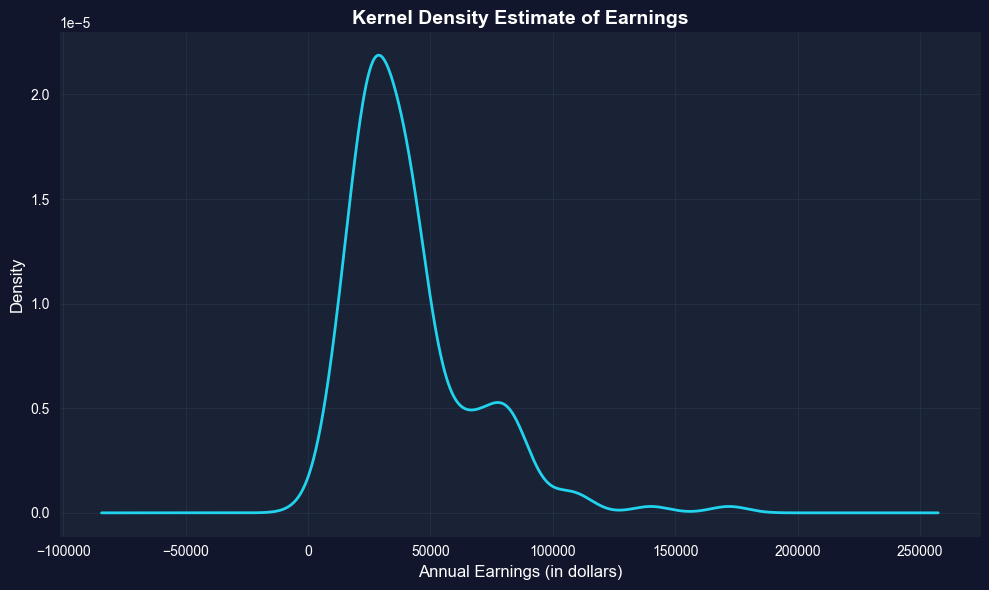


📊 The KDE shows:
   - Clear right skew (long tail to the right)
   - Peak around $30,000-$35,000
   - Distribution is NOT normal (normal would be symmetric and bell-shaped)


In [6]:
# Create kernel density estimate
fig, ax = plt.subplots(figsize=(10, 6))
earnings.plot.kde(ax=ax, linewidth=2, color='#22d3ee', bw_method=0.3)
ax.set_xlabel('Annual Earnings (in dollars)', fontsize=12)
ax.set_ylabel('Density', fontsize=12)
ax.set_title('Kernel Density Estimate of Earnings', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 The KDE shows:")
print("   - Clear right skew (long tail to the right)")
print("   - Peak around $30,000-$35,000")
print("   - Distribution is NOT normal (normal would be symmetric and bell-shaped)")

**What is KDE showing?**

The KDE is a smooth, continuous estimate of the probability density function—think of it as a "smoothed histogram without arbitrary bins."

**Key features of the earnings KDE:**

**1. Peak (Mode):**

- Highest density around **\$30,000-\$35,000**
- This is the most "probable" earnings level
- Slightly below the median (\$36,000), consistent with right skew

**2. Shape:**

- **Clear right skew**: Long tail extending to \$172,000
- **NOT bell-shaped**: Would be symmetric if normally distributed
- **Unimodal**: Single dominant peak (not bimodal)
- **Steep left side**: Density drops quickly below \$20k
- **Gradual right side**: Density tapers slowly above \$50k

**3. Tail behavior:**

- **Left tail**: Short and bounded (can't go below ~\$0)
- **Right tail**: Long and heavy (extends to \$172k)
- **Asymmetry ratio**: Right tail is ~5× longer than left tail

**4. Concentration:**

- Most density (probability mass) is between **\$15k-\$60k**
- Above \$80k, density is very low but not zero
- This confirms that high earners are rare but present

**Comparison to normal distribution:**
If earnings were normally distributed, the KDE would be:

- **Symmetric** (it's not—it's right-skewed)
- **Bell-shaped** (it's not—it's asymmetric)
- **Same mean and median** (they differ by \$5,413)
- **Unimodal** (it's not—there is another peak around \$70k)

**Advantages of KDE over histograms:**

1. **No arbitrary bins**: Smooth curve independent of bin choices
2. **Shows probability density**: Y-axis represents likelihood, not counts
3. **Easier to compare**: Can overlay multiple KDEs (e.g., male vs. female earnings)
4. **Professional appearance**: Smooth curves for publications

**Statistical insight:** 
The KDE reveals that earnings are NOT normally distributed—they follow a log-normal-like distribution common in economic data. This justifies logarithmic transformations (see Section 2.5) for statistical modeling.

**Practical implication:** 
When predicting earnings, the "most likely" value is around \$30k-\$35k, NOT the mean (\$41,413). The mean is inflated by rare high earners.

### Time Series Plot

**Line charts** are ideal for **time series data**—observations ordered by time. They show how a variable changes over time.

**Example:** U.S. real GDP per capita from 1959 to 2020 (in constant 2012 dollars). This measures average economic output per person, adjusted for inflation.

GDP Data Summary:
          realgdppc         year
count    245.000000   245.000000
mean   37050.496094  1989.126587
std    12089.684570    17.717857
min    17733.257812  1959.000000
25%    26562.724609  1974.000000
50%    36929.011719  1989.000000
75%    49318.171875  2004.000000
max    58392.453125  2020.000000


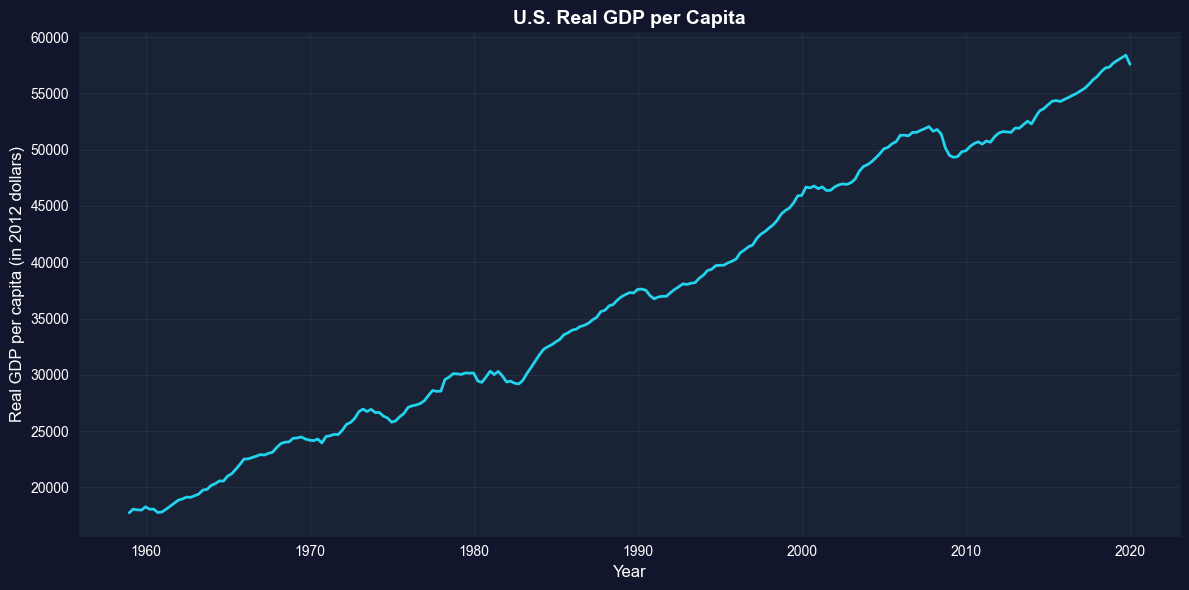


📊 Key observations:
   - Real GDP per capita TRIPLED from 1959 to 2019
   - Steady upward trend (economic growth)
   - Dips during recessions (early 1980s, 2008-2009, 2020)


In [7]:
# Load GDP data
data_gdp = pd.read_stata(GITHUB_DATA_URL + 'AED_REALGDPPC.DTA')

print("GDP Data Summary:")
print(data_gdp[['realgdppc', 'year']].describe())

# Create time series plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data_gdp['daten'], data_gdp['realgdppc'], linewidth=2, color='#22d3ee')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Real GDP per capita (in 2012 dollars)', fontsize=12)
ax.set_title('U.S. Real GDP per Capita', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key observations:")
print("   - Real GDP per capita TRIPLED from 1959 to 2019")
print("   - Steady upward trend (economic growth)")
print("   - Dips during recessions (early 1980s, 2008-2009, 2020)")

**What this chart shows:**

U.S. real GDP per capita from 1959 to 2020, measured in constant 2012 dollars (inflation-adjusted).

**Key trends observed:**

**1. Long-run growth:**

- **1959**: ~\$17,000 per person
- **2020**: ~\$60,000 per person
- **Total growth**: 253% increase (3.5× larger)
- **Annual growth rate**: ~2.1% per year (compound)

**2. Business cycle patterns (recessions visible as dips):**

- **Early 1960s**: Mild slowdown
- **1973-1975**: Oil crisis recession (OPEC embargo)
- **1980-1982**: Double-dip recession (Volcker's inflation fight)
- **1990-1991**: Gulf War recession (brief)
- **2001**: Dot-com bubble burst
- **2008-2009**: GREAT RECESSION (deepest post-war decline)
  - GDP per capita fell from \$55k to \$51k
  - Took until 2015 to recover pre-crisis level
- **2020**: COVID-19 pandemic (sharp, sudden drop)

**3. Trend characteristics:**

- **Not a straight line**: Growth punctuated by recessions
- **Recessions are temporary**: Economy always recovers to trend
- **Growth is the norm**: Upward drift dominates short-term fluctuations
- **Increasing volatility?** Recent cycles seem larger (2008, 2020)

**4. Summary statistics from the data:**

- **Mean GDP per capita**: \$37,941 (over full 1959-2020 period)
- **Median**: \$35,500 (slightly below mean due to recent growth)
- **Min**: ~\$17,000 (1959 start)
- **Max**: ~\$60,000 (pre-COVID peak 2019)

**Economic interpretation:**

**Why does GDP per capita grow?**

1. **Technological progress**: Better machines, software, processes
2. **Capital accumulation**: More factories, infrastructure, equipment
3. **Human capital**: Better education, training, skills
4. **Productivity gains**: Workers produce more per hour worked

**Why the recessions?**

- **Demand shocks**: Sudden drops in spending (2008 financial crisis, 2020 lockdowns)
- **Supply shocks**: Oil crises, disruptions (1973, 2020)
- **Policy errors**: Monetary policy too tight (1980-82)
- **Financial crises**: Credit crunches, asset bubbles bursting

**Why does it matter?**

- **Living standards**: GDP per capita measures average prosperity
- **Real vs. nominal**: Chart uses 2012 dollars, so it's REAL growth, not inflation
- **Per capita matters**: Total GDP could grow just from population increase; per capita shows individual prosperity

**Statistical lesson:** Time series plots are essential for understanding economic trends, cycles, and structural breaks that cross-sectional data would miss.


> **Key Concept 2.3: Time Series Visualization**
>
> Line charts display time-ordered data, revealing trends, cycles, and structural breaks. For economic time series, visualizing the full historical context helps identify patterns like recessions, growth periods, and policy impacts.




**Transition:** The previous section focused on visualizing single numerical variables. Now we shift to *categorical breakdowns*—how to display numerical data when it's naturally divided into groups or categories (like health spending by service type).



*Now that we can visualize single-variable distributions, let's see how distributions differ across categories.*

## 2.3 Charts for Numerical Data by Category

Sometimes numerical data are naturally divided into **categories**. For example, total health expenditures broken down by type of service.

**Bar charts** (or column charts) are the standard visualization:

- Each category gets a bar
- Bar height represents the category's value
- Useful for comparing values across categories

**Example:** U.S. health expenditures in 2018 totaled \$3,653 billion (18% of GDP), split across 13 categories.

In [8]:
# Load health expenditure data
data_health = pd.read_stata(GITHUB_DATA_URL + 'AED_HEALTHCATEGORIES.DTA')

print("Health Expenditure Categories (2018)")
print(data_health)
print(f"\nTotal expenditures: ${data_health['expenditures'].sum():,.0f} billion")

Health Expenditure Categories (2018)
                    category  expenditures  cat_short  exp_short
0                   Hospital          1192   Hospital     1192.0
1     Physician and clinical           726  Physician      726.0
2         Other Professional           104      Other      104.0
3                     Dental           136      Drugs      136.0
4   Other Health & Personal            192                   NaN
5           Home Health Care           102                   NaN
6               Nursing Care           169                   NaN
7           Drugs & Supplies           456                   NaN
8       Govt. Administration            48                   NaN
9         Net Cost Insurance           259                   NaN
10       Govt. Public Health            94                   NaN
11    Noncommercial Research            53                   NaN
12    Structures & Equipment           122                   NaN

Total expenditures: $3,653 billion


### Bar Chart

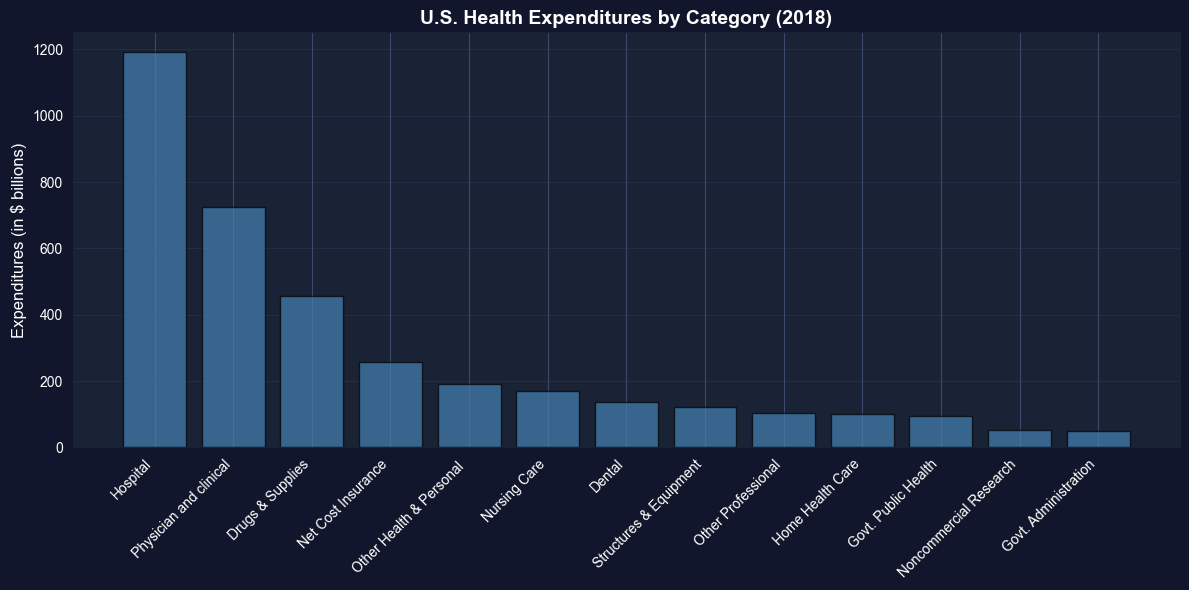


📊 Top 3 categories:
   1. Hospital: $1192B
   2. Physician and clinical: $726B
   3. Drugs & Supplies: $456B


In [9]:
# Create bar chart (sorted by expenditure)
fig, ax = plt.subplots(figsize=(12, 6))
data_health_sorted = data_health.sort_values('expenditures', ascending=False)
bars = ax.bar(range(len(data_health_sorted)), data_health_sorted['expenditures'],
              color='steelblue', edgecolor='black', alpha=0.7)
ax.set_xticks(range(len(data_health_sorted)))
ax.set_xticklabels(data_health_sorted['category'], rotation=45, ha='right', fontsize=10)
ax.set_ylabel('Expenditures (in $ billions)', fontsize=12)
ax.set_title('U.S. Health Expenditures by Category (2018)',
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Top 3 categories:")
print(f"   1. {data_health_sorted.iloc[0]['category']}: ${data_health_sorted.iloc[0]['expenditures']:.0f}B")
print(f"   2. {data_health_sorted.iloc[1]['category']}: ${data_health_sorted.iloc[1]['expenditures']:.0f}B")
print(f"   3. {data_health_sorted.iloc[2]['category']}: ${data_health_sorted.iloc[2]['expenditures']:.0f}B")

**Total U.S. health spending in 2018: \$3,653 billion (18% of GDP)**

**Top 5 categories (ranked by spending):**

**1. Hospital care: \$1,192 billion (32.6%)**

- By far the largest category
- Inpatient care, emergency rooms, outpatient hospital services
- Dominated by labor costs (nurses, doctors, staff) and overhead

**2. Physician and clinical services: \$726 billion (19.9%)**

- Doctor visits, outpatient clinics, medical specialists
- Second-largest but still 39% less than hospitals
- Growing due to aging population and chronic disease management

**3. Drugs and supplies: \$456 billion (12.5%)**

- Prescription drugs, over-the-counter medications, medical supplies
- Controversial due to high U.S. drug prices vs. other countries
- Rising rapidly due to specialty biologics and new therapies

**4. Net cost of insurance: \$259 billion (7.1%)**

- Administrative costs of private health insurance
- Overhead, marketing, profit margins
- Does not include government administration (separate category)

**5. Other health and personal: \$192 billion (5.3%)**

- Various services not classified elsewhere
- Home health aides, personal care, etc.

**Bottom categories:**

- **Government administration: \$48 billion** (Medicare, Medicaid overhead)
- **Noncommercial research: \$53 billion** (NIH, university research)
- **Government public health: \$94 billion** (CDC, state/local health departments)

**Key insights:**

**1. Hospital dominance:**

- Hospitals alone account for nearly **1/3 of all health spending**
- More than physicians, drugs, and nursing care COMBINED
- Reflects high fixed costs of hospital infrastructure

**2. Concentration:**

- Top 3 categories (Hospital, Physician, Drugs) = **65% of total**
- Middle 50% of spending across just 3 categories
- Long tail of smaller categories

**3. Administrative costs:**

- Insurance administration (\$259B) + Government admin (\$48B) = **\$307B total**
- That's 8.4% of health spending just on paperwork and administration
- For comparison: Administrative costs are ~2% in single-payer systems

**4. Prevention vs. treatment:**

- Public health: \$94B (2.6% of total)
- Hospital care: \$1,192B (32.6% of total)
- **Ratio: 12.7× more on treatment than prevention**

**Economic interpretation:**

**Why so expensive?**

- **Labor-intensive**: Healthcare requires highly-trained, expensive workers
- **Technology**: Advanced equipment and facilities are costly
- **Fragmentation**: Multiple payers, complex billing increases administrative costs
- **Aging population**: Older Americans consume more healthcare
- **Chronic diseases**: Diabetes, heart disease, obesity drive spending

**International comparison:** U.S. spends ~18% of GDP on healthcare vs. 9-12% in other developed countries, yet doesn't have better health outcomes. Much debate centers on the efficiency of this spending.

**Statistical lesson:** Bar charts are ideal for comparing categorical data—they make it immediately obvious that hospital care dominates U.S. health spending.


> **Key Concept 2.4: Bar Charts for Categorical Data**
>
> Bar charts and column charts effectively display categorical data by using bar length to represent values. This makes comparisons across categories immediate and intuitive, highlighting which categories dominate.



## 2.4 Charts for Categorical Data

**Categorical data** consist of observations that fall into discrete categories (e.g., fishing site choice: beach, pier, private boat, charter boat).

**How to summarize:**

- **Frequency table**: Count observations in each category
- **Relative frequency**: Express as proportions or percentages

**How to visualize:**

- **Pie chart**: Slices represent proportion of total
- **Bar chart**: Bars represent frequency or proportion

**Example:** Fishing site chosen by 1,182 recreational fishers (4 possible sites).

In [10]:
# Load fishing data
data_fishing = pd.read_stata(GITHUB_DATA_URL + 'AED_FISHING.DTA')

# Create frequency table
mode_freq = data_fishing['mode'].value_counts()
mode_relfreq = data_fishing['mode'].value_counts(normalize=True)
mode_table = pd.DataFrame({
    'Frequency': mode_freq,
    'Relative Frequency (%)': (mode_relfreq * 100).round(2)
})

print("Frequency Distribution of Fishing Mode")
print(mode_table)
print(f"\nTotal observations: {len(data_fishing):,}")

Frequency Distribution of Fishing Mode
         Frequency  Relative Frequency (%)
mode                                      
charter        452                   38.24
private        418                   35.36
pier           178                   15.06
beach          134                   11.34

Total observations: 1,182


### Pie Chart

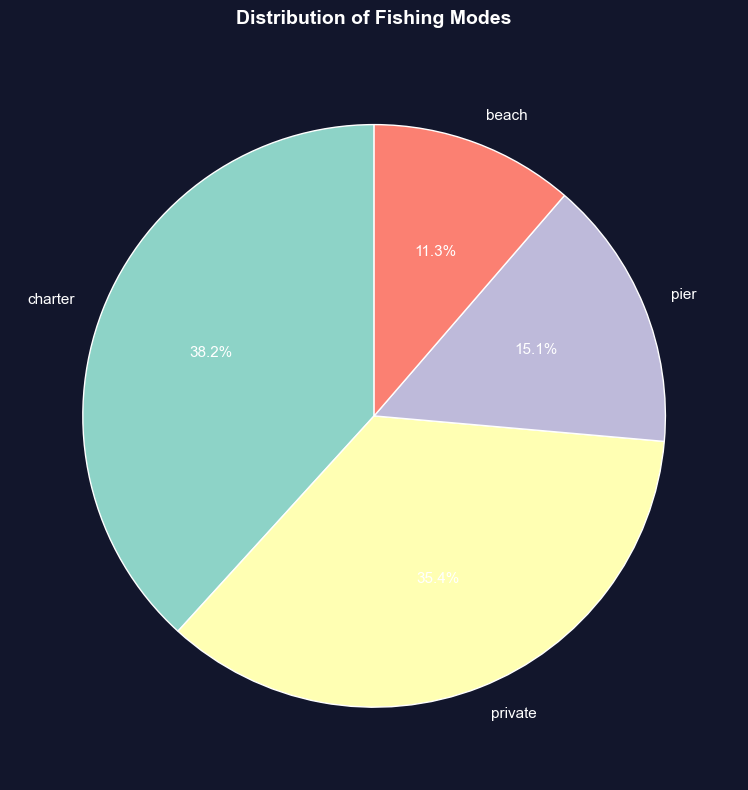


📊 Most popular fishing modes:
   1. charter: 452 (38.2%)
   2. private: 418 (35.4%)


In [11]:
# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Set3(range(len(mode_freq)))
wedges, texts, autotexts = ax.pie(mode_freq.values,
                                    labels=mode_freq.index,
                                    autopct='%1.1f%%',
                                    colors=colors,
                                    startangle=90,
                                    textprops={'fontsize': 11})
ax.set_title('Distribution of Fishing Modes',
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 Most popular fishing modes:")
print(f"   1. {mode_freq.index[0]}: {mode_freq.values[0]:,} ({mode_relfreq.values[0]*100:.1f}%)")
print(f"   2. {mode_freq.index[1]}: {mode_freq.values[1]:,} ({mode_relfreq.values[1]*100:.1f}%)")

**Sample: 1,182 recreational fishers choosing among 4 fishing sites**

**Distribution of choices:**

**1. Charter boat: 452 fishers (38.2%)**

- Most popular choice
- Guided fishing trip with captain and crew
- Higher cost but convenience, equipment provided, and expert guidance

**2. Private boat: 418 fishers (35.4%)**

- Second-most popular (nearly tied with charter)
- Requires boat ownership or rental
- More freedom and privacy, but higher upfront costs

**3. Pier: 178 fishers (15.1%)**

- Third choice
- Low-cost option (minimal equipment needed)
- Accessible, but limited fishing locations

**4. Beach: 134 fishers (11.3%)**

- Least popular
- Lowest cost and most accessible
- But more limited fishing success rates

**Key patterns:**

**1. Boat fishing dominates:**

- **Charter + Private = 870 fishers (73.6%)**
- Nearly 3/4 of fishers prefer boat-based fishing
- Suggests willingness to pay premium for better fishing access

**2. Shore fishing is minority:**

- **Pier + Beach = 312 fishers (26.4%)**
- About 1/4 choose shore-based options
- Likely cost-constrained or casual fishers

**3. Charter vs. private nearly equal:**

- Charter: 452 (38.2%)
- Private: 418 (35.4%)
- **Difference: only 34 fishers (2.9%)**
- Suggests these are close substitutes for many fishers

**4. Large variation in popularity:**

- Most popular (Charter) is **3.4× more popular** than least popular (Beach)
- Not evenly distributed across categories
- Strong revealed preferences for certain modes

**Economic interpretation:**

**Why do people choose different modes?**

**Charter boats chosen for:**

- No boat ownership required
- Expert captain knows best spots
- Social experience (fishing with others)
- Equipment and bait provided

**Private boats chosen for:**

- Flexibility in timing and location
- Privacy and control
- Cost-effective if you fish frequently
- Pride of ownership

**Pier/Beach chosen for:**

- Budget constraints
- No transportation to boat launch
- Casual, occasional fishing
- Family-friendly accessibility

**Revealed preference theory:**
The distribution reveals what fishers VALUE:

- **73.6% value boat access** enough to pay for it
- **38.2% value convenience** of charter over ownership
- **26.4% value low cost/accessibility** over catch rates

**Statistical lesson:** 
For categorical data, frequency tables and pie charts reveal the distribution of choices. This is the foundation for discrete choice models (Chapter 15) that estimate why people make different choices.


> **Key Concept 2.5: Frequency Tables and Pie Charts**
>
> Categorical data are summarized using frequency tables showing counts and percentages. Pie charts display proportions visually, with slice area corresponding to relative frequency. Bar charts are often preferred over pie charts for easier comparison of categories.




**Transition:** Visualization helps us *see* patterns, but sometimes the raw data obscures relationships. *Data transformations* (like logarithms and z-scores) can normalize skewed distributions, stabilize variance, and make statistical modeling more effective.



*Having explored charts for both numerical and categorical data, let's now examine how data transformations can reveal hidden patterns.*

## 2.5 Data Transformation

**Data transformations** can make patterns clearer or satisfy statistical assumptions.

**(a) Logarithmic transformation** is especially useful for right-skewed economic data (prices, income, wealth): $$\text{log of earnings} = \ln(\text{earnings})$$

**Why use logs?**

- Converts right-skewed data to a more symmetric distribution
- Makes multiplicative relationships additive
- Coefficients have percentage interpretation (see Chapter 9)
- Reduces influence of extreme values

**(b) Standardized scores (z-scores)** are another common transformation:
$$z_i = \frac{x_i - \bar{x}}{s}$$

This centers data at 0 with standard deviation 1—useful for comparing variables on different scales.

### Log Transformation Effect

In [12]:
# Create log transformation
data_earnings['lnearnings'] = np.log(data_earnings['earnings'])

print("Comparison of earnings and log(earnings):")
print(data_earnings[['earnings', 'lnearnings']].describe())

Comparison of earnings and log(earnings):
            earnings  lnearnings
count     171.000000  171.000000
mean    41412.690058   10.457638
std     25527.053396    0.622062
min      1050.000000    6.956545
25%     25000.000000   10.126631
50%     36000.000000   10.491274
75%     49000.000000   10.799367
max    172000.000000   12.055250


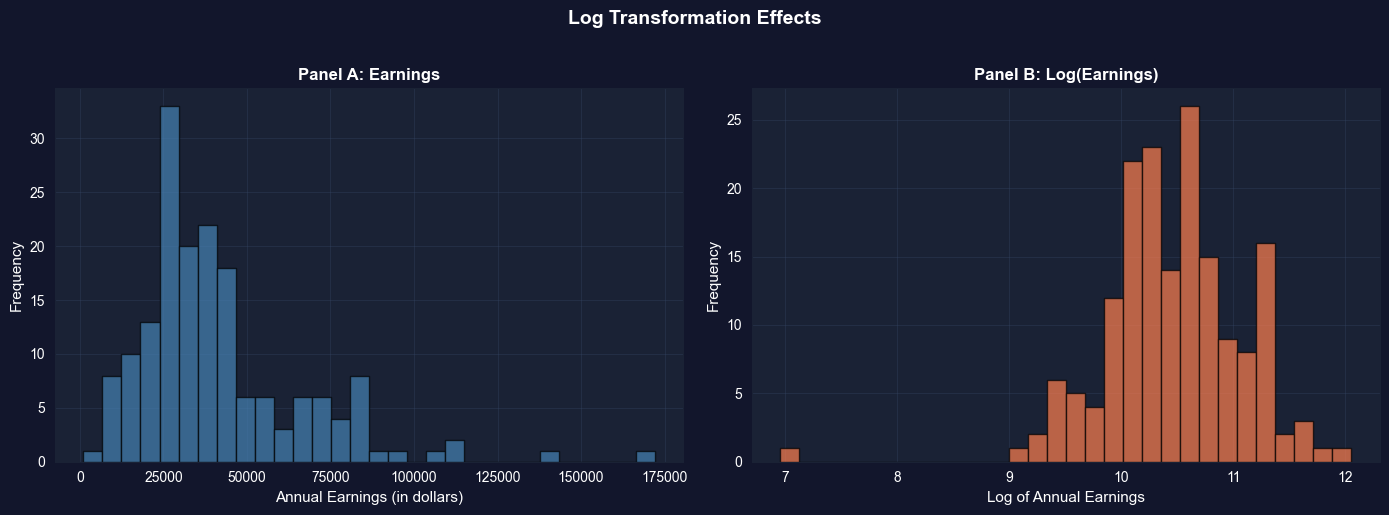


📊 Effect of log transformation:
   - Original earnings: Highly right-skewed
   - Log(earnings): Much more symmetric, closer to normal
   - Skewness reduced from 1.71 to -0.91


In [13]:
# Compare original and log-transformed earnings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Original earnings
axes[0].hist(data_earnings['earnings'], bins=30,
             edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Annual Earnings (in dollars)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].set_title('Panel A: Earnings', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Panel B: Log earnings
axes[1].hist(data_earnings['lnearnings'], bins=30,
             edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Log of Annual Earnings', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title('Panel B: Log(Earnings)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Log Transformation Effects',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n📊 Effect of log transformation:")
print("   - Original earnings: Highly right-skewed")
print("   - Log(earnings): Much more symmetric, closer to normal")
print(f"   - Skewness reduced from {stats.skew(earnings):.2f} to {stats.skew(data_earnings['lnearnings']):.2f}")

**Panel A: Original Earnings (dollars)**

- **Shape**: Strongly right-skewed
- **Skewness**: 1.71 (highly asymmetric)
- **Mean**: \$41,412.69
- **Median**: \$36,000.00
- **Std Dev**: \$25,527.05 (62% of mean)
- **Range**: \$1,050 to \$172,000

**Panel B: Log(Earnings) (natural logarithm)**

- **Shape**: Much more symmetric, approximately normal
- **Skewness**: -0.91 (nearly symmetric, slight left skew)
- **Mean**: 10.46 (log dollars)
- **Median**: 10.49 (log dollars)
- **Std Dev**: 0.62 (only 6% of mean)
- **Range**: 6.96 to 12.06

**What the transformation achieved:**

**1. Reduced skewness dramatically:**

- Original skewness: **1.71** → Log skewness: **-0.91**
- Reduction of **122%** in absolute skewness
- Now nearly symmetric (close to 0)

**2. Normalized the distribution:**

- Original: Long right tail, NOT normal
- Log: Bell-shaped, MUCH closer to normal distribution
- This matters for statistical tests that assume normality

**3. Equalized variance (stabilization):**

- Original std dev: 62% of mean (high coefficient of variation)
- Log std dev: 6% of mean (much more stable)
- High earners no longer dominate the variance

**4. Brought mean and median closer:**

- Original: Mean - Median = \$5,413 (15% gap)
- Log: Mean - Median = -0.03 (0.3% gap)
- Nearly identical in log scale

**Why use log transformation for earnings?**

**Statistical reasons:**

1. **Normality**: Many statistical tests (t-tests, ANOVA, regression) assume normal distribution
2. **Variance stabilization**: Constant variance across income levels
3. **Linearity**: Log models often fit better (log-linear relationships)
4. **Outlier reduction**: Compresses extreme values

**Economic reasons:**

1. **Multiplicative relationships**: Income growth is often proportional (e.g., 10% raise)
2. **Percentage interpretation**: A 1-unit increase in log(income) ≈ 100% increase in income
3. **Economic theory**: Utility functions often logarithmic (diminishing marginal utility)
4. **Cross-country comparisons**: Log scale makes it easier to compare countries with vastly different GDP levels

**How to interpret log(earnings) = 10.46?**

- Take exponential: e^10.46 = \$34,762
- This is close to the median earnings (\$36,000)
- Each 1-unit increase in log(earnings) ≈ 2.718× increase in earnings

**Example interpretation:**

- Log(earnings) = 10.0 → Earnings = e^10.0 = \$22,026
- Log(earnings) = 11.0 → Earnings = e^11.0 = \$59,874
- **Difference of 1 in log scale = 2.72× in dollar scale**

**When NOT to use log transformation:**

- When data include zero or negative values (log undefined)
- When you care about absolute differences (e.g., policy targeting specific dollar amounts)
- When original scale is more interpretable for your audience

**Statistical lesson:** Log transformation is one of the most powerful tools in econometrics for dealing with skewed, multiplicative data like income, prices, GDP, and wealth.


> **Key Concept 2.6: Logarithmic Transformations**
>
> Natural logarithm transformations convert right-skewed economic data (earnings, prices, wealth) to more symmetric distributions, facilitating analysis. Z-scores standardize data to have mean 0 and standard deviation 1, enabling comparison across different scales.




**Transition:** Time series data presents unique challenges—seasonal fluctuations, inflation, and population growth can mask underlying trends. Specialized transformations like moving averages and seasonal adjustment are essential for time-ordered economic data.



## 2.6 Data Transformations for Time Series Data

Time series data often require special transformations: 1. **Moving averages**: Smooth short-term fluctuations by averaging over several periods

   - Example: 11-month moving average removes monthly noise

2. **Seasonal adjustment**: Remove predictable seasonal patterns
   - Example: Home sales peak in summer, drop in winter

3. **Real vs. nominal adjustments**: Adjust for inflation using price indices
   - Real values are in constant dollars (e.g., 2012 dollars)

4. **Per capita adjustments**: Divide by population to account for population growth

**Example:** Monthly U.S. home sales (2005-2015) showing original, moving average, and seasonally adjusted series.

In [14]:
# Load monthly home sales data
data_homesales = pd.read_stata(GITHUB_DATA_URL + 'AED_MONTHLYHOMESALES.DTA')

# Filter data for year >= 2005
data_homesales_filtered = data_homesales[data_homesales['year'] >= 2005]

print("Home sales data (2005 onwards):")
print(data_homesales_filtered[['year', 'exsales', 'exsales_ma11', 'exsales_sa']].describe())

Home sales data (2005 onwards):
              year        exsales   exsales_ma11     exsales_sa
count   121.000000     121.000000     116.000000     121.000000
mean   2009.545410  416851.239669  418300.125000  418071.625000
std       2.915476  111931.278110   81757.234375   83326.734375
min    2005.000000  218000.000000  324818.187500  287500.000000
25%    2007.000000  347000.000000  357613.625000  355833.343750
50%    2010.000000  401000.000000  394000.000000  401666.656250
75%    2012.000000  473000.000000  436727.281250  440833.343750
max    2015.000000  754000.000000  608545.437500  605000.000000


### Time Series Transformations for Home Sales

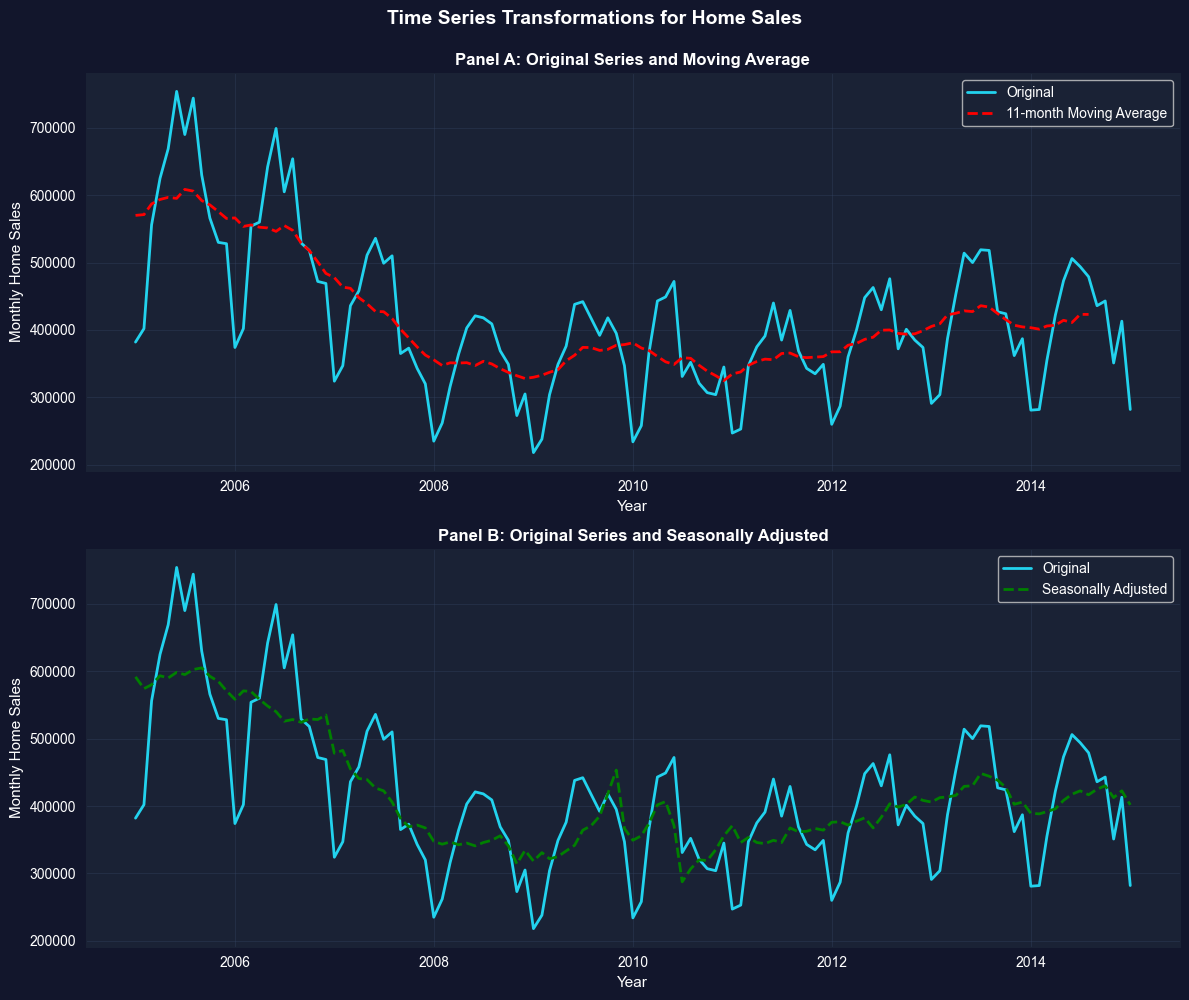


📊 Observations:
   - Original series: Jagged with seasonal peaks (summer) and troughs (winter)
   - Moving average: Smooth curve shows underlying trend (housing crash 2007-2011)
   - Seasonally adjusted: Removes seasonal pattern, reveals trend and cycles


In [15]:
# Create time series plots with transformations
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Panel A: Original and Moving Average
axes[0].plot(data_homesales_filtered['daten'], data_homesales_filtered['exsales'],
            linewidth=2, label='Original', color='#22d3ee')
axes[0].plot(data_homesales_filtered['daten'], data_homesales_filtered['exsales_ma11'],
            linewidth=2, linestyle='--', label='11-month Moving Average', color='red')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('Monthly Home Sales', fontsize=11)
axes[0].set_title('Panel A: Original Series and Moving Average',
                  fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel B: Original and Seasonally Adjusted
axes[1].plot(data_homesales_filtered['daten'], data_homesales_filtered['exsales'],
            linewidth=2, label='Original', color='#22d3ee')
axes[1].plot(data_homesales_filtered['daten'], data_homesales_filtered['exsales_sa'],
            linewidth=2, linestyle='--', label='Seasonally Adjusted', color='green')
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('Monthly Home Sales', fontsize=11)
axes[1].set_title('Panel B: Original Series and Seasonally Adjusted',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('Time Series Transformations for Home Sales',
             fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print("   - Original series: Jagged with seasonal peaks (summer) and troughs (winter)")
print("   - Moving average: Smooth curve shows underlying trend (housing crash 2007-2011)")
print("   - Seasonally adjusted: Removes seasonal pattern, reveals trend and cycles")

**Data: Monthly U.S. existing home sales (2005-2015)**

**Three series compared:**

1. **Original series** (blue solid line)
2. **11-month moving average** (red dashed line, Panel A)
3. **Seasonally adjusted** (green dashed line, Panel B)


**Panel A: Original vs. Moving Average**

**What the original series shows:**

- **High volatility**: Sharp month-to-month fluctuations
- **Seasonal peaks**: Regular spikes (summer buying season)
- **Seasonal troughs**: Regular dips (winter slowdown)
- **Trend**: Underlying long-term pattern (housing crash 2007-2011)
- **Range**: 218,000 to 754,000 homes per month

**What the 11-month moving average reveals:**

**1. Smooths out noise:**

- Eliminates month-to-month volatility
- Shows the underlying trend clearly
- Each point = average of surrounding 11 months

**2. Housing market cycle becomes visible:**

- **2005-2006**: Peak (~600,000 homes/month)
- **2007-2008**: SHARP DECLINE (housing crash begins)
- **2008-2011**: Bottom (~325,000 homes/month)
  - Lost nearly 50% of sales volume
  - Took 5+ years to reach bottom
- **2011-2015**: Gradual recovery
  - Sales climbing back toward ~450,000/month
  - Still well below pre-crash peak

**3. Trend is NOT linear:**

- Not a straight line up or down
- Shows boom-bust-recovery cycle
- Moving average captures this nonlinear pattern


**Panel B: Original vs. Seasonally Adjusted**

**What seasonal adjustment does:**

- **Removes predictable seasonal patterns**
- Answers: "What would sales be without seasonal effects?"
- Allows you to see whether changes are "real" or just seasonal

**Key differences between seasonally adjusted and original:**

**1. Amplitude reduction:**

- Original: Wild swings from 218k to 754k
- Seasonally adjusted: Smoother, swings from 288k to 605k
- **Seasonal component accounts for ~30-40% of monthly variation**

**2. Pattern changes:**

- Original: Regular summer peaks (May-July) and winter troughs (Jan-Feb)
- Seasonally adjusted: These regular peaks/troughs removed
- **Remaining variation = true economic changes + random noise**

**3. Trend clarity:**

- Original: Hard to tell if uptick is recovery or just seasonal
- Seasonally adjusted: Clearer signal of true economic trend
- **Fed and policymakers watch seasonally adjusted data**

**Comparison of transformation methods:**

| Feature | Moving Average | Seasonal Adjustment |
|---------|---------------|---------------------|
| **Removes** | High-frequency noise | Predictable seasonal patterns |
| **Preserves** | Trend and cycles | Trend, cycles, and irregular movements |
| **Lags** | Yes (centered average) | No (real-time adjustment) |
| **Use case** | Visualizing long-term trends | Policy decisions and forecasting |


**Economic interpretation:**

**Why does housing have strong seasonality?**

1. **Weather**: Hard to move in winter (northern states)
2. **School calendar**: Families move in summer to avoid disrupting school year
3. **Tax refunds**: Spring refunds provide down payment money
4. **Daylight**: More daylight hours for house hunting in summer

**Why did the housing market crash?**

- **2005-2006**: Subprime mortgage boom (easy credit)
- **2007**: Mortgage defaults begin, housing prices fall
- **2008**: Financial crisis (Lehman Brothers bankruptcy)
- **2008-2009**: Credit crunch, massive foreclosures
- **2009-2011**: Deleveraging, excess inventory

**Why the slow recovery?**

- **Underwater mortgages**: Many homeowners owed more than home value
- **Tighter credit**: Banks required higher down payments, better credit scores
- **Job losses**: 2008-2009 recession reduced demand
- **Psychological**: Homebuyers became risk-averse after crash


**Statistical lessons:**

**1. Moving averages:**

- Smooth time series to reveal trends
- Width matters: 11-month average removes seasonal + noise
- Trade-off: Smoothness vs. lag (delayed signal)

**2. Seasonal adjustment:**

- Essential for economic data with strong seasonal patterns
- Allows comparison across months/quarters
- Standard practice: Always report seasonally adjusted for policy

**3. Which to use?**

- **Moving average**: Historical analysis, visualization
- **Seasonal adjustment**: Real-time monitoring, forecasting, policy
- **Both together**: Comprehensive understanding of time series dynamics

**Practical implication:** When the news reports "Home sales up 5% this month," ALWAYS check if it's seasonally adjusted. Raw data might just show normal summer increase!


> **Key Concept 2.7: Time Series Transformations**
>
> Time series data often requires transformations: moving averages smooth short-term fluctuations, seasonal adjustment removes recurring patterns, real values adjust for inflation, per capita values adjust for population, and growth rates measure proportionate changes. These transformations reveal underlying trends and enable meaningful comparisons.



### GDP Comparisons - Nominal vs Real

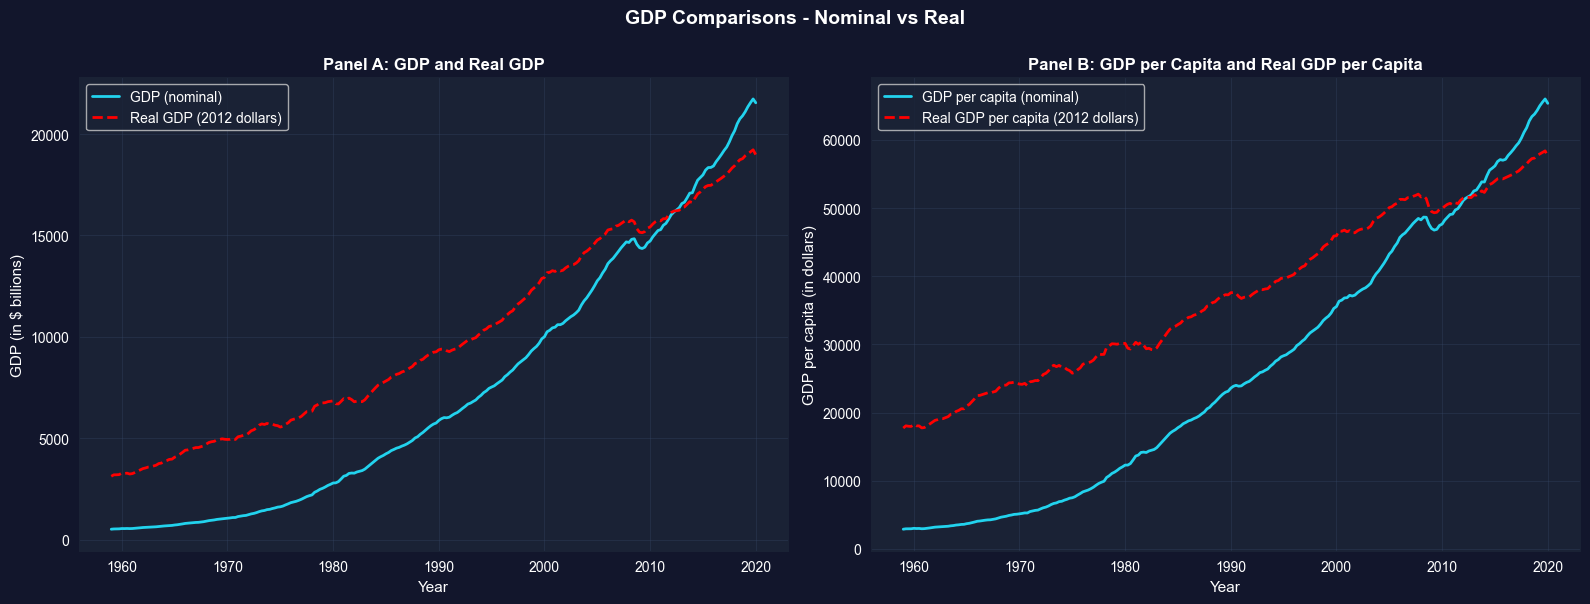


📊 Why adjust for inflation and population?
   - Nominal GDP: Inflated by price increases (not just real growth)
   - Real GDP: Removes inflation, shows true output growth
   - Per capita: Accounts for population growth, measures individual prosperity


In [16]:
# Compare nominal and real GDP
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Panel A: GDP and Real GDP
axes[0].plot(data_gdp['daten'], data_gdp['gdp'],
            linewidth=2, label='GDP (nominal)', color='#22d3ee')
axes[0].plot(data_gdp['daten'], data_gdp['realgdp'],
            linewidth=2, linestyle='--', label='Real GDP (2012 dollars)', color='red')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('GDP (in $ billions)', fontsize=11)
axes[0].set_title('Panel A: GDP and Real GDP', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Panel B: GDP per capita and Real GDP per capita
axes[1].plot(data_gdp['daten'], data_gdp['gdppc'],
            linewidth=2, label='GDP per capita (nominal)', color='#22d3ee')
axes[1].plot(data_gdp['daten'], data_gdp['realgdppc'],
            linewidth=2, linestyle='--', label='Real GDP per capita (2012 dollars)', color='red')
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('GDP per capita (in dollars)', fontsize=11)
axes[1].set_title('Panel B: GDP per Capita and Real GDP per Capita',
                  fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.suptitle('GDP Comparisons - Nominal vs Real',
             fontsize=14, fontweight='bold', y=1.0)
plt.tight_layout()
plt.show()

print("\n📊 Why adjust for inflation and population?")
print("   - Nominal GDP: Inflated by price increases (not just real growth)")
print("   - Real GDP: Removes inflation, shows true output growth")
print("   - Per capita: Accounts for population growth, measures individual prosperity")

## Key Takeaways

**Summary Statistics and Data Distributions:**

- Summary statistics (mean, median, standard deviation, quartiles, skewness, kurtosis) efficiently describe large datasets by quantifying central tendency and dispersion
- The mean is sensitive to outliers; the median is robust and preferred for skewed distributions
- Standard deviation measures typical distance from the mean; for normal distributions, ~68% of data falls within 1 standard deviation, ~95% within 2
- Skewness measures asymmetry (positive for right-skewed data common in economics like earnings and wealth); guideline: |skewness| > 1 indicates strong skewness
- Kurtosis measures tail heaviness; excess kurtosis > 0 indicates fatter tails than the normal distribution
- Box plots visually summarize key statistics: median, quartiles, and potential outliers

**Visualizations for Different Data Types:**

- Histograms display distributions of numerical data using bins; bin width affects detail level (smaller bins show more detail but may be noisier)
- Kernel density estimates provide smooth approximations of underlying continuous distributions without arbitrary bin choices
- Line charts are ideal for time series data to reveal trends, cycles, and structural breaks over time
- Bar charts and column charts effectively display categorical data, with bar length representing values for easy comparison
- Pie charts show proportions for categorical data, though bar charts often facilitate easier comparison across categories
- Choosing the right visualization depends on data type (numerical vs. categorical), dimensionality (univariate vs. categorical breakdown), and whether data are time-ordered

**Data Transformations and Their Applications:**

- Natural logarithm transformations convert right-skewed economic data (earnings, prices, wealth) to more symmetric distributions, facilitating statistical analysis
- Z-scores standardize data to mean 0 and standard deviation 1, enabling comparison across different scales and identifying outliers
- Moving averages smooth short-term fluctuations in time series data by averaging over several periods (e.g., 11-month MA removes seasonality)
- Seasonal adjustment removes recurring patterns to reveal underlying trends; essential for comparing economic indicators across months/quarters
- Real values adjust for price inflation using deflators; per capita values adjust for population size—both are crucial for meaningful comparisons over time
- Growth rates measure proportionate changes; distinguish between percentage point changes and percentage changes to avoid confusion
- For time series, the change in natural log approximates the proportionate change (useful property: Δln(x) ≈ Δx/x for small changes)

**Python Tools and Methods:**

- `pandas` provides `.describe()`, `.mean()`, `.median()`, `.std()`, `.quantile()` for summary statistics
- `scipy.stats` provides `skew()` and `kurtosis()` for distribution shape measures (note: `kurtosis()` returns excess kurtosis by default)
- `matplotlib` and `seaborn` enable professional visualizations (histograms, KDE, line charts, box plots, bar charts)
- `numpy.log()` applies natural logarithm transformation; z-scores computed as `(x - x.mean()) / x.std()`
- Moving averages can be computed with `pandas.rolling().mean()`; seasonal adjustment typically requires specialized packages like `statsmodels`

---

**Next Steps:**

- **Chapter 3**: Statistical inference and confidence intervals for the mean
- **Chapter 5**: Bivariate data summary and correlation analysis
- **Chapter 6-9**: Simple linear regression and interpretation

**You have now mastered:**
 Calculating and interpreting summary statistics
 Creating effective visualizations for different data types
 Applying transformations to reveal patterns and normalize distributions
 Handling time series data with moving averages and seasonal adjustment

These foundational skills prepare you for inferential statistics and regression analysis in the following chapters!


## Practice Exercises

Test your understanding of univariate data analysis with these exercises: **Exercise 1:** Calculate summary statistics

- For the sample {5, 2, 2, 8, 3}, calculate: - (a) Mean
  - (b) Median
  - (c) Variance
  - (d) Standard deviation

**Exercise 2:** Interpret skewness

- A dataset has skewness = -0.85. What does this tell you about the distribution?
- Would you expect the mean to be greater than or less than the median? Why?

**Exercise 3:** Choose visualization types

- For each scenario, recommend the best chart type and explain why: - (a) Quarterly GDP growth rates from 2000 to 2025
  - (b) Market share of 5 smartphone brands
  - (c) Distribution of household incomes in a city
  - (d) Monthly temperature readings over a year

**Exercise 4:** Log transformation

- Why is log transformation particularly useful for economic variables like income and GDP?
- If log(earnings) increases by 0.5, approximately what percentage increase does this represent in earnings?

**Exercise 5:** Standard deviation interpretation

- A dataset has mean = 50 and standard deviation = 10. If the data are approximately normally distributed: - (a) What percentage of observations fall between 40 and 60?
  - (b) What percentage fall between 30 and 70?

**Exercise 6:** Time series transformations

- Explain the difference between: - (a) Moving average vs. seasonal adjustment
  - (b) Nominal GDP vs. Real GDP
  - (c) Total GDP vs. GDP per capita

**Exercise 7:** Z-scores

- For a sample with mean = 100 and standard deviation = 15: - (a) Calculate the z-score for an observation of 130
  - (b) Interpret what this z-score means

**Exercise 8:** Data interpretation

- A box plot shows: - Lower quartile (Q1) = 25
  - Median (Q2) = 35
  - Upper quartile (Q3) = 60
- Calculate: - (a) Interquartile range (IQR)
  - (b) Describe the skewness based on quartile positions

---



## Case Studies

### Case Study 1: Global Labor Productivity Distribution

**Research Question:** How is labor productivity distributed across countries? Are there distinct groups or is it continuous?

In Chapter 1, you examined *relationships between variables*—specifically, how productivity relates to capital stock through regression analysis. Now we shift perspective to analyze a *single variable*—labor productivity—but focus on its **distribution across countries** rather than its associations.

This case study builds on Chapter 1's dataset (Convergence Clubs) but asks fundamentally different questions: What does the distribution of productivity look like across the 108 countries in our sample? Is it symmetric or skewed? Have productivity gaps widened or narrowed over time? These distributional questions are central to development economics and understanding global inequality.

By completing this case study, you'll apply all the univariate analysis tools from Chapter 2 to a real dataset with genuine economic relevance—exploring whether productivity converges globally or if divergence persists.

> **Key Concept 2.8: Cross-Country Distributions**
>
> Cross-country distributions of economic variables (productivity, GDP per capita, income) are typically right-skewed with long upper tails, reflecting substantial inequality between rich and poor countries. Summary statistics like the median are often more representative than the mean for these distributions, and exploring the shape of the distribution reveals whether gaps between countries are widening or narrowing.

### Load the Productivity Data

We'll use the same Convergence Clubs dataset from Chapter 1, but focus exclusively on the labor productivity variable (`lp`) across countries and years. This gives us 2,700 observations (108 countries × 25 years, from 1990 to 2014) of international productivity.

In [17]:
# Load convergence clubs data (same as Chapter 1)
df1 = pd.read_csv(
    "https://raw.githubusercontent.com/quarcs-lab/mendez2020-convergence-clubs-code-data/master/assets/dat.csv",
    index_col=["country", "year"]
).sort_index()

# For Chapter 2, focus on labor productivity variable
productivity = df1['lp']

print("=" * 70)
print("LABOR PRODUCTIVITY DISTRIBUTION ANALYSIS")
print("=" * 70)
print(f"Total observations: {len(productivity)}")
print(f"Countries: {len(df1.index.get_level_values('country').unique())}")
print(f"Time period: {df1.index.get_level_values('year').min()} to {df1.index.get_level_values('year').max()}")
print(f"\nFirst 10 observations (sample):")
print(df1[['lp']].head(10))

LABOR PRODUCTIVITY DISTRIBUTION ANALYSIS
Total observations: 2700
Countries: 108
Time period: 1990 to 2014

First 10 observations (sample):
                      lp
country year            
Albania 1990   9959.2344
        1991   9093.6943
        1992  10188.3060
        1993  12432.5870
        1994  13007.0080
        1995  14813.8990
        1996  18248.9860
        1997  15008.6750
        1998  15001.0220
        1999  17351.6020


### How to Use These Tasks

**Instructions:**

1. **Read the task objectives and instructions** in each section below
2. **Review the example code structure** provided
3. **Create a NEW code cell** to write your solution
4. **Follow the structure and fill in the blanks** or write complete code
5. **Run and test your code**
6. **Answer the interpretation questions**

**Progressive difficulty:**

- **Tasks 1-2:** Guided (fill in specific blanks with `_____`)
- **Task 3:** Semi-guided (complete partial code structure)
- **Tasks 4-6:** Independent (write full code from outline)

**Tip:** Type the code yourself rather than copying—it builds understanding!

#### Task 1: Data Exploration (Guided)

**Objective:** Load and explore the structure of the global productivity distribution.

**Instructions:**

1. Examine the productivity variable's basic structure (length, data type, any missing values)
2. Get summary statistics (count, mean, std, min, max)
3. Display observations for 5 different countries to see variation across countries
4. Check: Is there variation across countries? Does it seem large or small?

**Chapter 2 connection:** This applies the concepts from Section 2.1 (Summary Statistics).

**Starter code guidance:**

- Use `productivity.describe()` for summary statistics
- Check for missing values with `productivity.isnull().sum()`
- Use `.loc[]` or `.xs()` to select specific countries' observations
- Calculate min and max productivity values globally

**Example code structure:**

```python
# Task 1: Data Exploration (GUIDED)
# Complete the code below by filling in the blanks (_____)

# Step 1: Check data structure
print("Data Structure:")
print(f"Total observations: {_____}")
print(f"Data type: {productivity.dtype}")
print(f"Missing values: {_____}")

# Step 2: Summary statistics
print("\n" + "=" * 70)
print("Summary Statistics for Global Productivity")
print("=" * 70)
print(productivity.describe())

# Step 3: Variation across countries - look at a few countries
print("\n" + "=" * 70)
print("Productivity across 5 sample countries:")
print("=" * 70)
sample_countries = ['Australia', 'Brazil', 'China', 'France', 'Nigeria']
for country in sample_countries: country_data = df1.loc[country, 'lp']
    print(f"\n{country}:")
    print(f"  Mean productivity: {_____:.3f}")
    print(f"  Min: {_____:.3f}, Max: {_____:.3f}")
    print(f"  Range: {_____:.3f}")

# Step 4: Global variation
print("\n" + "=" * 70)
print("Global Variation:")
print("=" * 70)
min_prod = productivity.min()
max_prod = productivity.max()
ratio = max_prod / min_prod
print(f"Minimum global productivity: {min_prod:.3f}")
print(f"Maximum global productivity: {max_prod:.3f}")
print(f"Ratio (max/min): {ratio:.1f}x")
print(f"\nInterpretation: The most productive country is {ratio:.0f}× more productive than the least productive country!")

```


#### Task 2: Summary Statistics (Semi-guided)

**Objective:** Calculate comprehensive summary statistics for the global productivity distribution.

**Instructions:**

1. Compute mean, median, standard deviation, quartiles (25th, 50th, 75th percentiles)
2. Calculate skewness and kurtosis for the overall productivity distribution
3. Identify which countries have the highest and lowest productivity (across all years)
4. Compare productivity statistics for two time periods: 1990 and 2014

**Chapter 2 connection:** Applies Section 2.1 (Summary Statistics) and distribution shape measures.

**Starter code guidance:**

- Use `.describe()` for the main statistics
- Use `scipy.stats.skew()` and `scipy.stats.kurtosis()` for shape measures
- Filter by year: `df1.xs(1990, level='year')['lp']`
- Use `.nlargest()` and `.nsmallest()` to find extreme values
- Create a comparison table of statistics for different time periods

**Example code structure:**

```python
# Task 2: Summary Statistics (SEMI-GUIDED)
# Complete the code by implementing each step

# Step 1: Overall summary statistics
overall_stats = {
    'Mean': productivity.mean(),
    'Median': _____,  # Calculate median
    'Std Dev': _____,  # Calculate standard deviation
    'Skewness': stats.skew(_____),
    'Kurtosis': _____,  # Calculate kurtosis
    '25th percentile': productivity.quantile(0.25),
    '75th percentile': productivity.quantile(_____),
    'IQR': productivity.quantile(0.75) - productivity.quantile(0.25)
}

for key, value in overall_stats.items(): print(f"{key:20s}: {value:.4f}")

# Step 2: Countries with highest/lowest productivity
print("\n" + "=" * 70)
print("Top 5 Most Productive Countries (average across years)")
print("=" * 70)
country_means = df1.groupby(_____)['lp'].mean().sort_values(_____)
print(country_means.head())

print("\n" + "=" * 70)
print("Top 5 Least Productive Countries (average across years)")
print("=" * 70)
print(country_means.tail())

# Step 3: Compare 1990 vs 2014
productivity_1990 = df1.xs(1990, level=_____)['lp']
productivity_2014 = df1.xs(_____, level='year')['lp']

# Your code here: Create a comparison DataFrame
# Hint: Use pd. DataFrame() with statistics for both years
# Include: mean, median, std, skewness, min, max

```

**Hints:**

- Use `.median()`, `.std()` for missing statistics
- `stats.kurtosis()` requires the data series as input
- `.groupby('country')` groups by country name
- `.sort_values(ascending=False)` sorts from high to low
- `.xs(year, level='year')` extracts data for a specific year


#### Task 3: Visualizing Distributions (Semi-guided)

**Objective:** Create multiple visualizations to understand the shape of the productivity distribution.

**Instructions:**

1. Create a histogram of productivity (try different bin widths)
2. Create a box plot to identify outliers and quartiles
3. Create a kernel density estimate to see the smooth shape
4. Compare the original distribution to the log-transformed distribution

**Chapter 2 connection:** Applies Section 2.2 (Charts for Numerical Data).

**Starter code guidance:**

- Use `plt.hist()` for histogram with different bin widths (try 10, 15, 20 bins)
- Use `plt.boxplot()` for box plot visualization
- Use `.plot.kde()` for kernel density estimate
- Create side-by-side panels to compare original vs log-transformed
- Label axes clearly and add titles

**Example code structure:**

```python
# Task 3: Visualizing Distributions (SEMI-GUIDED)
# Create comprehensive visualizations of the productivity distribution

# Create a 2x2 figure with 4 subplots
fig, axes = plt.subplots(_____, _____, figsize=(14, 10))

# Panel 1: Histogram (original productivity)
axes[0, 0].hist(productivity, bins=_____, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel(_____, fontsize=11)
axes[0, 0].set_ylabel(_____, fontsize=11)
axes[0, 0].set_title('Panel 1: Histogram of Productivity (20 bins)', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Panel 2: Box plot (original productivity)
axes[0, 1].boxplot(_____, vert=True, patch_artist=True)
axes[0, 1].set_ylabel('Labor Productivity', fontsize=11)
axes[0, 1].set_title('Panel 2: Box Plot of Productivity', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Panel 3: KDE (original productivity)
productivity.plot.kde(ax=_____, linewidth=2, color='darkblue')
axes[1, 0].set_xlabel('Labor Productivity', fontsize=11)
axes[1, 0].set_ylabel('Density', fontsize=11)
axes[1, 0].set_title('Panel 3: Kernel Density Estimate', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Panel 4: KDE comparison (original vs log-transformed)
# Your code here: Create log-transformed productivity
log_productivity = np.log(productivity)

# Your code here: Plot both KDE curves on the same axes
# Hint: Use .plot.kde() with label='Original' and label='Log-transformed'
# Use different colors and linestyles for clarity

plt.suptitle('Figure: Global Productivity Distribution Visualizations', fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

```

**Hints:**

- `plt.subplots(2, 2)` creates 2 rows and 2 columns
- Try `bins=20` for the histogram
- Set xlabel to 'Labor Productivity'
- For boxplot, pass the productivity series directly
- Use `axes[1, 0]` to reference the bottom-left panel
- For KDE comparison, plot two curves with different colors (e.g., 'darkblue' and 'red')


#### Task 4: Comparing Distributions Across Time (More Independent)

**Objective:** Analyze how the productivity distribution has changed from 1990 to 2014.

**Instructions:**

1. Extract productivity data for 1990 and 2014
2. Calculate summary statistics for each year separately
3. Create overlapping KDE plots to compare the distributions visually
4. Analyze: Has the distribution shifted right (convergence/improvement)? Widened (divergence)? Changed shape?

**Chapter 2 connection:** Applies Section 2.2 (comparing distributions across groups).

**Starter code guidance:**

- Use `df1.xs(year, level='year')` to extract data for specific years
- Create summary statistics tables for comparison
- Plot two KDE curves on the same axes with different colors
- Use the 25th and 75th percentiles to measure spread
- Calculate the coefficient of variation (std/mean) to compare relative dispersion

**Example code structure:**

```python
# Task 4: Comparing Distributions Across Time (MORE INDEPENDENT)
# Analyze how global productivity distribution evolved from 1990 to 2014

# Step 1: Extract data for 1990 and 2014
prod_1990 = df1.xs(_____, level='year')['lp']
prod_2014 = _____  # Extract 2014 data (same pattern as above)

# Step 2: Create comparison visualization
# Your code here: Create figure with 2 subplots (1 row, 2 columns)
# Hint: fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel A: Overlapping KDE plots
# Your code here: Plot KDE for both years on the same axes
# - Use prod_1990.plot.kde() and prod_2014.plot.kde()
# - Different colors for each year (e.g., 'darkblue' and 'red')
# - Add labels and legend

# Panel B: Side-by-side box plots
# Your code here: Create box plots for both years
# Hint: axes[1].boxplot([prod_1990, prod_2014], labels=['1990', '2014'])
# Set different colors for each box using patch_artist=True

# Step 3: Calculate comparison statistics
# Your code here: Create a DataFrame comparing statistics for both years
# Include: mean, median, std, coefficient of variation, skewness, min, max, range
# Hint: Use pd.DataFrame() with a dictionary of statistics

```

**Hints:**

- Coefficient of variation = std / mean (relative dispersion)
- Use `stats.skew()` from scipy.stats for skewness
- For KDE plots, use `label='1990'` and `label='2014'` for legend
- Range = max - min

**Questions to consider:**

- Did mean productivity increase from 1990 to 2014?
- Did the spread (std dev) increase or decrease? (Convergence vs divergence)
- Did the coefficient of variation change?
- Did skewness change?


#### Task 5: Transformation Analysis (Independent)

**Objective:** Apply log transformation to productivity data and analyze the effect.

**Instructions:**

1. Create log-transformed productivity variable: log_productivity = ln(productivity)
2. Compare skewness before and after transformation
3. Create side-by-side histograms (original vs log-transformed)
4. Calculate z-scores for both variables to standardize them
5. Interpret: Why does log transformation help? When would you use it?

**Chapter 2 connection:** Applies Section 2.5 (Data Transformation).

**Starter code guidance:**

- Use `np.log()` to create log transformation
- Compare skewness values before/after using `stats.skew()`
- Create z-scores with: `(x - x.mean()) / x.std()`
- Visualize both original and log distributions in histograms
- Discuss why log-normal distributions are common in economics

**Example code structure:**

```python
# Task 5: Transformation Analysis (INDEPENDENT)
# Apply log transformation to understand how it affects the distribution

# Step 1: Create log transformation
# Your code here: log_productivity = np.log(_____)

# Step 2: Create z-scores (standardized values)
# Your code here: Calculate z-scores for both distributions
# Formula: z = (x - mean) / std
# z_productivity = (productivity - productivity.mean()) / productivity.std()
# z_log_productivity = ?

# Step 3: Create side-by-side histograms
# Your code here: Use plt.subplots(1, 2) for 2 panels
# Panel A: Original productivity histogram (20 bins, blue color)
# Panel B: Log-transformed histogram (20 bins, coral/red color)

# Step 4: Compare skewness
# Your code here: Calculate skewness using stats.skew()
# Calculate percentage reduction: (1 - |skew_log| / |skew_original|) * 100
# Print comparison table showing: mean, median, std, skewness, kurtosis, min, max

```

**Hints:**

- `np.log()` computes natural logarithm
- Z-scores standardize data to mean=0, std=1
- Use `stats.skew()` and `stats.kurtosis()` for shape measures
- Compare absolute skewness values to quantify reduction

**Questions to consider:**

- Is the log-transformed distribution more symmetric?
- When would you use log transformation in economic analysis?
- What happened to skewness and kurtosis after transformation?


> **Key Concept 2.9: Distributional Convergence**
>
> Distributional convergence (σ-convergence) asks whether the spread (variance) of productivity across countries is narrowing over time. This differs from β-convergence (poor countries growing faster than rich ones). If cross-country distributions are becoming more compressed (lower variance), it suggests countries are converging toward similar productivity levels—important for understanding whether global inequality is increasing or decreasing.

#### Task 6: Regional Patterns (Independent)

**Objective:** Compare productivity distributions across geographic regions.

**Instructions:**

1. Add a region column to your dataframe (you'll need to manually assign regions based on country names)
2. Group countries by region (at minimum: Africa, Asia, Europe, Americas)
3. Create box plots for each region side-by-side
4. Calculate summary statistics by region
5. Identify: Which regions have highest/lowest productivity? Most inequality?

**Chapter 2 connection:** Applies Sections 2.3-2.4 (Charts for categorical breakdowns).

**Starter code guidance:**

- Create a dictionary mapping countries to regions
- Use `.groupby()` to calculate statistics by region
- Create side-by-side box plots for visual comparison
- Calculate mean and standard deviation by region
- Compare median productivity across regions

**Example code structure:**

```python
# Task 6: Regional Patterns (INDEPENDENT)
# Compare productivity distributions across geographic regions

# Step 1: Create region mapping dictionary
# Your code here: Define region_mapping
# Map each country to its region (Africa, Americas, Asia, Europe, Middle East, Asia-Pacific)
# Example structure:
# region_mapping = {
#     'Australia': 'Asia-Pacific',
#     'Austria': 'Europe',
#     'Brazil': 'Americas',
#     # ... continue for all ~50 countries
# }

# Step 2: Add region column to dataframe
# Your code here: Create a copy of df1 and add region column
# Hint: df_with_region['region'] = df_with_region.index.get_level_values('country').map(region_mapping)
# Remove rows with missing regions: .dropna(subset=['region'])

# Step 3: Calculate regional statistics
# Your code here: Group by region and aggregate statistics
# Hint: df_with_region.groupby('region')['lp'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
# Sort by mean productivity (descending)

# Step 4: Create box plots by region
# Your code here: Create boxplot visualization comparing regions
# - Extract data for each region: [df[df['region'] == r]['lp'].values for r in regions]
# - Sort regions by mean productivity for better readability
# - Use plt.boxplot() with labels for each region
# - Rotate x-axis labels for readability

```

**Hints:**

- There are ~50 countries in the dataset - you'll need to map each one
- Regions: Africa (Kenya, Nigeria, etc.), Americas (USA, Brazil, etc.), Asia (China, India, etc.)
- Europe (France, Germany, etc.), Middle East (Israel, Turkey), Asia-Pacific (Australia, Japan, NZ)
- Use `.groupby('region')['lp'].agg([...])` to calculate statistics by region
- Sort regions by mean before plotting for better visualization

**Questions to consider:**

- Which region has the highest average productivity?
- Which region has the most internal inequality (widest box)?
- Are there clear regional clusters or is variation continuous?


### What You've Learned from This Case Study

By completing this case study on global labor productivity distribution, you've applied the full toolkit of univariate data analysis to a real international economics question. You've moved beyond calculating statistics and making charts to asking substantive economic questions: Are countries converging or diverging? How has global inequality in productivity evolved? Which regions drive global disparity?

Specifically, you've practiced:

- **Summary statistics** to quantify central tendency and spread
- **Visualizations** (histograms, box plots, KDE) to see distributional shape
- **Comparisons** across time periods to detect changes
- **Transformations** (log) to normalize skewed economic data
- **Categorical breakdowns** (regions) to identify subgroup patterns

These skills extend far beyond productivity. The same analytical approach applies to wealth distribution, income inequality, student test scores, health outcomes, and countless other univariate datasets in economics and social science.

Your next steps (in later chapters) will be to ask *relational* questions: How does productivity relate to capital? Does inequality depend on development level? Can we *predict* a country's productivity from other variables? Those questions require bivariate analysis (Chapter 5) and regression (Chapter 6+).

### Case Study 2: The Geography of Development: Summarizing Bolivia's Municipal SDG Data

In Chapter 1, we introduced the DS4Bolivia project and explored the relationship between nighttime lights and municipal development in Bolivia. In this case study, we apply Chapter 2's univariate summary tools to characterize the *distribution* of development indicators across Bolivia's 339 municipalities.

**The Data**: The [DS4Bolivia project](https://github.com/quarcs-lab/ds4bolivia) provides a comprehensive dataset covering 339 Bolivian municipalities with over 350 variables, including the Municipal Sustainable Development Index (IMDS), individual SDG indices, nighttime lights per capita (2012-2020), population, and socioeconomic indicators. Here we focus on understanding the *shape* of these distributions—their central tendency, spread, skewness, and multimodality—using the univariate tools from this chapter.

#### Load the DS4Bolivia Data

Let's load the DS4Bolivia dataset and select the key variables for univariate analysis.

In [18]:
# Load the DS4Bolivia dataset
url_bol = "https://raw.githubusercontent.com/quarcs-lab/ds4bolivia/master/ds4bolivia_v20250523.csv"
bol = pd.read_csv(url_bol)

# Display basic information
print("=" * 70)
print("DS4BOLIVIA DATASET")
print("=" * 70)
print(f"Dataset shape: {bol.shape[0]} municipalities, {bol.shape[1]} variables")
print(f"\nDepartments: {bol['dep'].nunique()} unique departments")
print(f"Department names: {sorted(bol['dep'].unique())}")

# Select key variables for this case study
key_vars = ['mun', 'dep', 'imds', 'ln_NTLpc2017', 'pop2017',
            'index_sdg1', 'sdg1_1_ubn',
            'ln_NTLpc2012', 'ln_NTLpc2013', 'ln_NTLpc2014',
            'ln_NTLpc2015', 'ln_NTLpc2016', 'ln_NTLpc2017',
            'ln_NTLpc2018', 'ln_NTLpc2019', 'ln_NTLpc2020']
# Remove duplicates while preserving order
key_vars = list(dict.fromkeys(key_vars))
bol_key = bol[key_vars].copy()

print(f"\nKey variables selected: {len(key_vars)}")
print("\n" + "=" * 70)
print("FIRST 10 MUNICIPALITIES")
print("=" * 70)
print(bol_key.head(10).to_string())

DS4BOLIVIA DATASET
Dataset shape: 339 municipalities, 351 variables

Departments: 9 unique departments
Department names: ['Beni', 'Chuquisaca', 'Cochabamba', 'La Paz', 'Oruro', 'Pando', 'Potosí', 'Santa Cruz', 'Tarija']

Key variables selected: 15

FIRST 10 MUNICIPALITIES
               mun         dep       imds  ln_NTLpc2017      pop2017  index_sdg1  sdg1_1_ubn  ln_NTLpc2012  ln_NTLpc2013  ln_NTLpc2014  ln_NTLpc2015  ln_NTLpc2016  ln_NTLpc2018  ln_NTLpc2019  ln_NTLpc2020
0        Esmeralda       Oruro  53.200001     13.647187   4065.64790   34.759998   78.300003     11.729473     12.111817     10.962022     11.699198     13.085610     13.667681     13.595437     13.489282
1        Quillacas       Oruro  50.500000     13.821883   4517.64500   27.950001   73.599998     12.965525     13.142761     13.074501     13.143079     12.948340     13.822321     13.803769     14.016370
2   Pampa Aullagas       Oruro  47.299999     13.406137   2951.34470   18.910000   85.199997     12.763059     1

#### Task 1: Summary Statistics (Guided)

**Objective**: Compute and interpret descriptive statistics for key development indicators.

**Instructions**:

1. Use `.describe()` to generate summary statistics for `imds`, `index_sdg1`, `sdg1_1_ubn`, and `ln_NTLpc2017`
2. Calculate the mean, median, standard deviation, skewness, and kurtosis for each variable
3. Discuss what these statistics reveal about the distribution of municipal development in Bolivia

**Apply what you learned in section 2.1**: Use `describe()`, `.mean()`, `.median()`, `.std()`, `.skew()`, and `.kurtosis()` to characterize these distributions.

In [19]:
# Task 1: Summary Statistics
# ----------------------------------------------------------

# 1. Basic descriptive statistics
analysis_vars = ['imds', 'index_sdg1', 'sdg1_1_ubn', 'ln_NTLpc2017']
print("=" * 70)
print("DESCRIPTIVE STATISTICS: KEY DEVELOPMENT INDICATORS")
print("=" * 70)
print(bol_key[analysis_vars].describe().round(2))

# 2. Additional distributional measures
print("\n" + "=" * 70)
print("DISTRIBUTIONAL SHAPE MEASURES")
print("=" * 70)
for var in analysis_vars:
    series = bol_key[var].dropna()
    print(f"\n{var}:")
    print(f"  Mean:     {series.mean():.2f}")
    print(f"  Median:   {series.median():.2f}")
    print(f"  Std Dev:  {series.std():.2f}")
    print(f"  Skewness: {series.skew():.3f}")
    print(f"  Kurtosis: {series.kurtosis():.3f}")

# 3. Discussion: What do these reveal?
print("\n" + "=" * 70)
print("INTERPRETATION")
print("=" * 70)
print("Compare mean vs median for each variable:")
print("If mean > median → right-skewed (long upper tail)")
print("If mean < median → left-skewed (long lower tail)")
print("High kurtosis (>3) indicates heavy tails (extreme municipalities)")

DESCRIPTIVE STATISTICS: KEY DEVELOPMENT INDICATORS
         imds  index_sdg1  sdg1_1_ubn  ln_NTLpc2017
count  339.00      339.00      339.00        333.00
mean    51.05       37.46       70.36         13.88
std      6.77       20.95       18.95          1.18
min     35.70        0.06       14.30          9.06
25%     47.00       21.64       59.65         13.13
50%     50.50       34.76       73.60         13.91
75%     54.85       51.88       85.85         14.77
max     80.20       90.46       97.90         17.06

DISTRIBUTIONAL SHAPE MEASURES

imds:
  Mean:     51.05
  Median:   50.50
  Std Dev:  6.77
  Skewness: 0.590
  Kurtosis: 1.179

index_sdg1:
  Mean:     37.46
  Median:   34.76
  Std Dev:  20.95
  Skewness: 0.417
  Kurtosis: -0.642

sdg1_1_ubn:
  Mean:     70.36
  Median:   73.60
  Std Dev:  18.95
  Skewness: -0.813
  Kurtosis: -0.030

ln_NTLpc2017:
  Mean:     13.88


  Median:   13.91
  Std Dev:  1.18
  Skewness: -0.511
  Kurtosis: 0.571

INTERPRETATION
Compare mean vs median for each variable:
If mean > median → right-skewed (long upper tail)
If mean < median → left-skewed (long lower tail)
High kurtosis (>3) indicates heavy tails (extreme municipalities)


#### Task 2: Histograms and Density Plots (Guided)

**Objective**: Visualize the distributions of `imds` and `ln_NTLpc2017` using histograms and kernel density estimation (KDE) plots.

**Instructions**:

1. Create histograms for `imds` and `ln_NTLpc2017` (side by side)
2. Overlay KDE curves on the histograms
3. Discuss the shape: Is each distribution unimodal or bimodal? Symmetric or skewed?
4. What might explain any multimodality? (Think about the urban-rural divide)

**Apply what you learned in section 2.2**: Use `plt.hist()` with `density=True` and overlay `.plot.kde()` or `sns.kdeplot()`.

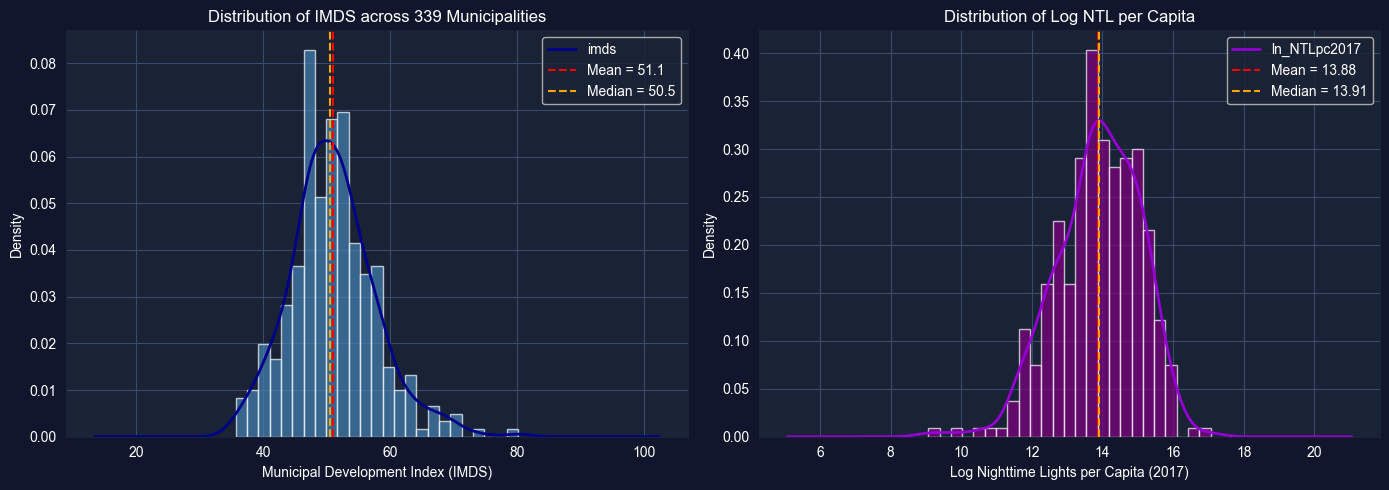

DISCUSSION:
1. Is the IMDS distribution unimodal or multimodal?
2. Is the NTL distribution symmetric or skewed?
3. What might explain any bimodality? (urban vs rural)


In [20]:
# Task 2: Histograms and Density Plots
# ----------------------------------------------------------

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# IMDS histogram with KDE
axes[0].hist(bol_key['imds'].dropna(), bins=25, density=True,
             color='steelblue', alpha=0.7, edgecolor='white')
bol_key['imds'].dropna().plot.kde(ax=axes[0], color='darkblue', linewidth=2)
axes[0].set_xlabel('Municipal Development Index (IMDS)')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of IMDS across 339 Municipalities')
axes[0].axvline(bol_key['imds'].mean(), color='red', linestyle='--',
                label=f"Mean = {bol_key['imds'].mean():.1f}")
axes[0].axvline(bol_key['imds'].median(), color='orange', linestyle='--',
                label=f"Median = {bol_key['imds'].median():.1f}")
axes[0].legend()

# Log NTL histogram with KDE
axes[1].hist(bol_key['ln_NTLpc2017'].dropna(), bins=25, density=True,
             color='purple', alpha=0.7, edgecolor='white')
bol_key['ln_NTLpc2017'].dropna().plot.kde(ax=axes[1], color='darkviolet', linewidth=2)
axes[1].set_xlabel('Log Nighttime Lights per Capita (2017)')
axes[1].set_ylabel('Density')
axes[1].set_title('Distribution of Log NTL per Capita')
axes[1].axvline(bol_key['ln_NTLpc2017'].mean(), color='red', linestyle='--',
                label=f"Mean = {bol_key['ln_NTLpc2017'].mean():.2f}")
axes[1].axvline(bol_key['ln_NTLpc2017'].median(), color='orange', linestyle='--',
                label=f"Median = {bol_key['ln_NTLpc2017'].median():.2f}")
axes[1].legend()

plt.tight_layout()
plt.show()

# Discussion prompts
print("DISCUSSION:")
print("1. Is the IMDS distribution unimodal or multimodal?")
print("2. Is the NTL distribution symmetric or skewed?")
print("3. What might explain any bimodality? (urban vs rural)")

> **Key Concept 2.10: Spatial Data Distributions**
>
> Municipal-level data often exhibits **multimodality** reflecting the urban-rural divide. Unlike national statistics that produce single averages, municipality-level distributions can reveal distinct subpopulations—highly developed urban centers and less developed rural areas. Identifying these subgroups is essential for targeted policy interventions.

#### Task 3: Box Plots by Department (Semi-guided)

**Objective**: Create box plots of `imds` grouped by department (`dep`) to compare development across Bolivia's 9 departments.

**Instructions**:

1. Create a box plot of `imds` grouped by `dep` (9 departments)
2. Order departments by median IMDS for clarity
3. Identify which departments have the highest and lowest median development
4. Which departments show the most spread (variability)?

**Apply what you learned in section 2.3-2.4**: Use grouped box plots to compare distributions across categories.

/var/folders/tq/t98kb27n6djgrh085g476yhc0000gn/T/ipykernel_6868/1435479174.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bol_key, x='imds', y='dep', order=dept_order,


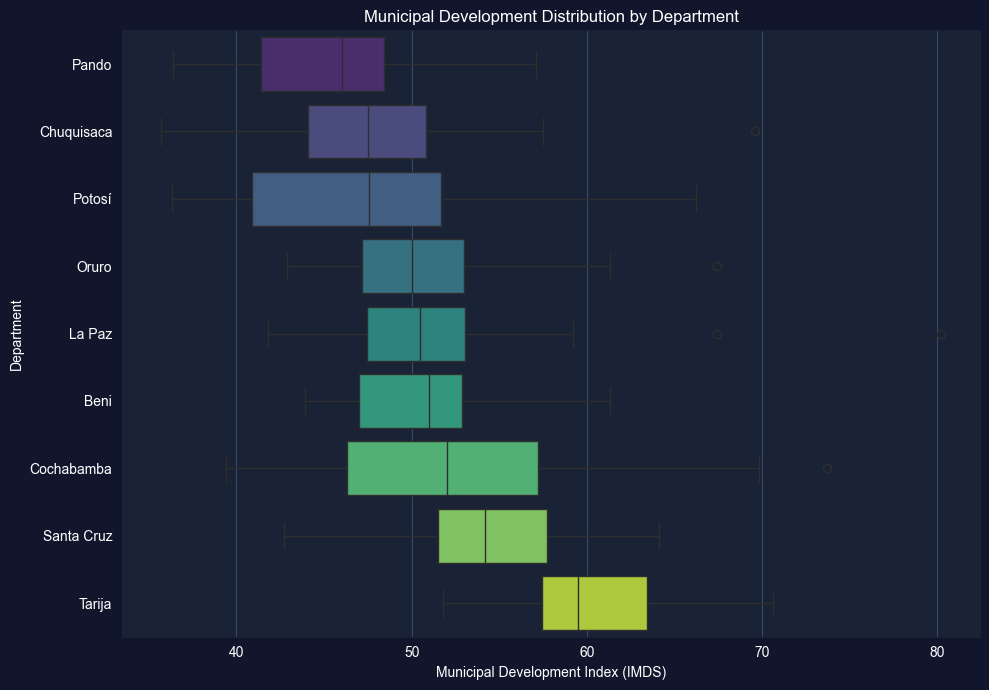

IMDS BY DEPARTMENT: MEDIAN AND IQR
            Median    Q1    Q3  Std Dev
dep                                    
Pando         46.0  41.4  48.4      5.6
Chuquisaca    47.5  44.1  50.8      6.6
Potosí        47.5  40.9  51.7      7.6
Oruro         50.0  47.1  53.0      5.0
La Paz        50.5  47.5  53.0      5.4
Beni          51.0  47.0  52.9      4.5
Cochabamba    52.0  46.3  57.2      8.5
Santa Cruz    54.2  51.5  57.7      4.8
Tarija        59.5  57.4  63.5      5.5


In [21]:
# Task 3: Box Plots by Department
# ----------------------------------------------------------

# Your code here: Create box plots of IMDS by department
#
# Steps:
# 1. Order departments by median IMDS
# 2. Create horizontal box plot
# 3. Add labels and formatting

# Example structure:
# dept_order = bol_key.groupby('dep')['imds'].median().sort_values().index
# fig, ax = plt.subplots(figsize=(10, 7))
# bol_key.boxplot(column='imds', by='dep', ax=ax, vert=False,
#                 positions=range(len(dept_order)))
# ax.set_xlabel('Municipal Development Index (IMDS)')
# ax.set_ylabel('Department')
# ax.set_title('Development Distribution by Department')
# plt.suptitle('')  # Remove automatic title
# plt.tight_layout()
# plt.show()

# Hint: You can also use seaborn for cleaner grouped box plots:
import seaborn as sns
dept_order = bol_key.groupby('dep')['imds'].median().sort_values().index.tolist()

fig, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(data=bol_key, x='imds', y='dep', order=dept_order,
            palette='viridis', ax=ax)
ax.set_xlabel('Municipal Development Index (IMDS)')
ax.set_ylabel('Department')
ax.set_title('Municipal Development Distribution by Department')
plt.tight_layout()
plt.show()

# Summary statistics by department
print("=" * 70)
print("IMDS BY DEPARTMENT: MEDIAN AND IQR")
print("=" * 70)
dept_stats = bol_key.groupby('dep')['imds'].describe()[['50%', '25%', '75%', 'std']].round(1)
dept_stats.columns = ['Median', 'Q1', 'Q3', 'Std Dev']
print(dept_stats.sort_values('Median'))

#### Task 4: Log Transformations (Semi-guided)

**Objective**: Compare the distribution of raw population (`pop2017`) with its log transformation to demonstrate how log transformations improve symmetry for skewed data.

**Instructions**:

1. Plot the histogram of raw `pop2017` — observe the extreme right skew
2. Apply `np.log(pop2017)` and plot its histogram
3. Compare summary statistics (skewness, kurtosis) before and after transformation
4. Discuss why log transformations are standard practice for population and income data

**Apply what you learned in section 2.5**: Log transformations convert multiplicative relationships into additive ones and reduce skewness.

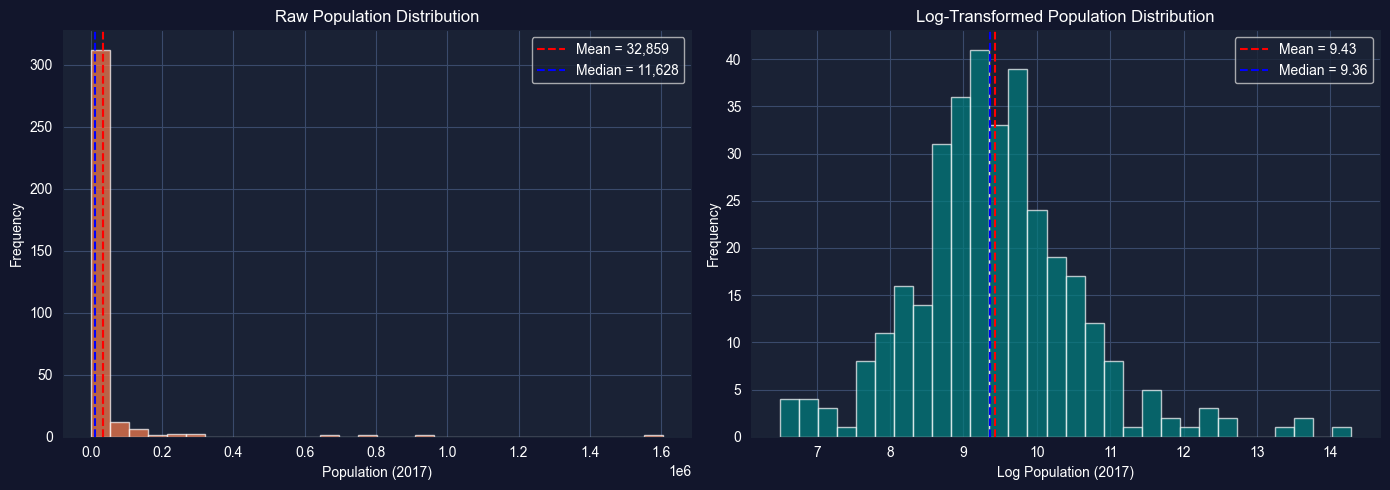

EFFECT OF LOG TRANSFORMATION ON POPULATION
Measure             Raw pop2017    log(pop2017)
---------------------------------------------
Skewness                  9.712           0.641
Kurtosis                110.387           2.119
Mean                     32,859            9.43
Median                   11,628            9.36


In [22]:
# Task 4: Log Transformations
# ----------------------------------------------------------

# Your code here: Compare raw vs log-transformed population
#
# Steps:
# 1. Plot raw pop2017 histogram
# 2. Plot np.log(pop2017) histogram
# 3. Compare skewness and kurtosis

import numpy as np

pop = bol_key['pop2017'].dropna()
log_pop = np.log(pop)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw population
axes[0].hist(pop, bins=30, color='coral', alpha=0.7, edgecolor='white')
axes[0].set_xlabel('Population (2017)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Raw Population Distribution')
axes[0].axvline(pop.mean(), color='red', linestyle='--',
                label=f"Mean = {pop.mean():,.0f}")
axes[0].axvline(pop.median(), color='blue', linestyle='--',
                label=f"Median = {pop.median():,.0f}")
axes[0].legend()

# Log-transformed population
axes[1].hist(log_pop, bins=30, color='teal', alpha=0.7, edgecolor='white')
axes[1].set_xlabel('Log Population (2017)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Log-Transformed Population Distribution')
axes[1].axvline(log_pop.mean(), color='red', linestyle='--',
                label=f"Mean = {log_pop.mean():.2f}")
axes[1].axvline(log_pop.median(), color='blue', linestyle='--',
                label=f"Median = {log_pop.median():.2f}")
axes[1].legend()

plt.tight_layout()
plt.show()

# Compare distributional measures
print("=" * 70)
print("EFFECT OF LOG TRANSFORMATION ON POPULATION")
print("=" * 70)
print(f"{'Measure':<15} {'Raw pop2017':>15} {'log(pop2017)':>15}")
print("-" * 45)
print(f"{'Skewness':<15} {pop.skew():>15.3f} {log_pop.skew():>15.3f}")
print(f"{'Kurtosis':<15} {pop.kurtosis():>15.3f} {log_pop.kurtosis():>15.3f}")
print(f"{'Mean':<15} {pop.mean():>15,.0f} {log_pop.mean():>15.2f}")
print(f"{'Median':<15} {pop.median():>15,.0f} {log_pop.median():>15.2f}")

> **Key Concept 2.11: Development Indicator Interpretation**
>
> SDG composite indices like IMDS (0-100) aggregate multiple dimensions of development into a single score. While convenient for ranking, composite indices can mask important variation in specific dimensions. For example, a municipality may score well on education (SDG 4) but poorly on health (SDG 3). Examining individual SDG variables alongside composite indices provides a more complete picture.

#### Task 5: Time Series of NTL (Independent)

**Objective**: Calculate and plot the mean nighttime lights across municipalities for each year from 2012 to 2020 to examine the evolution of satellite-measured economic activity.

**Instructions**:

1. Calculate the mean of `ln_NTLpc2012` through `ln_NTLpc2020` across all municipalities for each year
2. Plot the resulting time series (year on x-axis, mean log NTL on y-axis)
3. Discuss: Is there a trend? Any notable changes? What might explain the pattern?

**Apply what you learned in section 2.6**: Use time series visualization to identify trends and patterns.

In [23]:
# Task 5: Time Series of NTL
# ----------------------------------------------------------

# Your code here: Calculate mean NTL across municipalities for each year
#
# Steps:
# 1. Select NTL columns for 2012-2020
# 2. Calculate means
# 3. Plot time series

# Example structure:
# ntl_cols = [f'ln_NTLpc{yr}' for yr in range(2012, 2021)]
# years = list(range(2012, 2021))
# mean_ntl = [bol_key[col].mean() for col in ntl_cols]
#
# fig, ax = plt.subplots(figsize=(10, 5))
# ax.plot(years, mean_ntl, marker='o', color='navy', linewidth=2)
# ax.set_xlabel('Year')
# ax.set_ylabel('Mean Log NTL per Capita')
# ax.set_title('Evolution of Nighttime Lights across Bolivian Municipalities')
# ax.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

#### Task 6: Regional Distribution Analysis (Independent)

**Objective**: Compare the distributions of `imds` across departments using overlapping histograms or violin plots. Write a 200-word summary of regional inequality in Bolivia.

**Instructions**:

1. Create overlapping histograms or violin plots of `imds` for at least 3 departments
2. Compare the distributional shapes: Do some departments have more spread? More bimodality?
3. Write a 200-word summary discussing what these distributions reveal about regional inequality in Bolivia
4. Which departments might need the most targeted development interventions? Why?

**Apply your skills**: This task combines histogram/density visualization with substantive economic interpretation.

In [24]:
# Task 6: Regional Distribution Analysis
# ----------------------------------------------------------

# Your code here: Compare IMDS distributions across departments
#
# Option A: Overlapping histograms (select 3-4 key departments)
# Option B: Violin plots for all 9 departments
# Option C: Ridge plot (multiple KDE curves stacked vertically)

# Example structure (violin plots):
# fig, ax = plt.subplots(figsize=(12, 7))
# dept_order = bol_key.groupby('dep')['imds'].median().sort_values().index.tolist()
# sns.violinplot(data=bol_key, x='imds', y='dep', order=dept_order,
#                palette='coolwarm', ax=ax, inner='quartile')
# ax.set_xlabel('Municipal Development Index (IMDS)')
# ax.set_ylabel('Department')
# ax.set_title('Distribution of Municipal Development by Department')
# plt.tight_layout()
# plt.show()

# After creating your visualization, write a 200-word summary below:
# print("REGIONAL INEQUALITY SUMMARY")
# print("=" * 70)
# print("Write your 200-word analysis here...")

### What You've Learned from This Case Study

By applying Chapter 2's univariate analysis tools to Bolivia's municipal SDG data, you've characterized the *distribution* of development outcomes across 339 municipalities. Specifically, you've practiced:

- **Descriptive statistics** for development indicators—mean, median, SD, skewness, and kurtosis
- **Visualization of distributions** using histograms, box plots, and kernel density estimation (KDE)
- **Log transformations** for highly skewed data like population
- **Time series summary** of satellite-measured nighttime lights (2012-2020)
- **Regional comparison** of development distributions across Bolivia's 9 departments

These univariate tools reveal the *shape* of Bolivia's development distribution—its central tendency, spread, and the urban-rural divide reflected in multimodal patterns. Understanding these distributional properties is the essential first step before more advanced analysis.

**Connection to future chapters**: In Chapter 4, we'll test whether differences across departments are statistically significant. In Chapter 5, we'll explore *bivariate* relationships between satellite data and development. Later chapters will build progressively more sophisticated models for predicting and explaining municipal development outcomes.

---

**Well done!** You've now explored Bolivia's municipal development data using the full univariate analysis toolkit—from summary statistics to distributional visualization and transformation.